<a href="https://colab.research.google.com/github/Vinayakgos/IML_Midsem_Project/blob/main/Dataset_2_IML_Midsem_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Loading Libraries, connect drive

##NOTE- Libraries not used for implementing any algorithm, many libraries imported havent been used, this is simple code block I normally use

In [11]:
import sklearn
import pandas as pd
import numpy as np
from numpy import errstate,isneginf
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as sc
import plotly.express as px


from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score

from sklearn.metrics import accuracy_score, balanced_accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report


import zipfile
import os
import json
import requests
import io
import copy
#import biomart
#import umap

In [12]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


# Prepare data

In [13]:
cols=["Class","age","menopause","tumor-size","inv-nodes","node-caps","deg-malig","breast","breast-quad","irradiat"]
df2= pd.read_csv('/content/drive/MyDrive/Colab Notebooks/breast-cancer-UCI-dataset.data',names=cols)
print(df2.shape)
df2.head()

(286, 10)


,Class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
0,no-recurrence-events,30-39,premeno,30-34,0-2,no,3,left,left_low,no
1,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,right,right_up,no
2,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,left,left_low,no
3,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,right,left_up,no
4,no-recurrence-events,40-49,premeno,0-4,0-2,no,2,right,right_low,no


In [14]:
df3=df2
df3.drop("Class", axis=1, inplace=False)
col=df2.iloc[:,0:1]
df3['class']=col
df3.drop("Class", axis=1, inplace=True)
df3.head()

,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat,class
0,30-39,premeno,30-34,0-2,no,3,left,left_low,no,no-recurrence-events
1,40-49,premeno,20-24,0-2,no,2,right,right_up,no,no-recurrence-events
2,40-49,premeno,20-24,0-2,no,2,left,left_low,no,no-recurrence-events
3,60-69,ge40,15-19,0-2,no,2,right,left_up,no,no-recurrence-events
4,40-49,premeno,0-4,0-2,no,2,right,right_low,no,no-recurrence-events


In [15]:
df3['class'].value_counts()

,count
class,
no-recurrence-events,201
recurrence-events,85


In [16]:
fig = px.histogram(data_frame=df3, x='class', color='class', color_discrete_sequence=['#A865C9', '#f6abb6'])
fig.update_yaxes(tickvals=list(range(0, 251, 25)), title='Frequency')

In [17]:
df3.columns

Index(['age', 'menopause', 'tumor-size', 'inv-nodes', 'node-caps', 'deg-malig',
       'breast', 'breast-quad', 'irradiat', 'class'],
      dtype='object')

In [18]:
df3.age.unique()

array(['30-39', '40-49', '60-69', '50-59', '70-79', '20-29'], dtype=object)

# Label Encoding

In [19]:
labeldf=df3.copy(deep=True)
le = LabelEncoder()
labeldf['age'] = le.fit_transform(labeldf['age'])
labeldf['menopause'] = le.fit_transform(labeldf['menopause'])
labeldf['tumor-size'] = le.fit_transform(labeldf['tumor-size'])
labeldf['inv-nodes'] = le.fit_transform(labeldf['inv-nodes'])
labeldf['node-caps'] = le.fit_transform(labeldf['node-caps'])
labeldf['deg-malig'] = le.fit_transform(labeldf['deg-malig'])
labeldf['breast'] = le.fit_transform(labeldf['breast'])
labeldf['breast-quad'] = le.fit_transform(labeldf['breast-quad'])
labeldf['irradiat']=le.fit_transform(labeldf['irradiat'])
labeldf['class']=le.fit_transform(labeldf['class'])
labeldf

,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat,class
0,1,2,5,0,1,2,0,2,0,0
1,2,2,3,0,1,1,1,5,0,0
2,2,2,3,0,1,1,0,2,0,0
3,4,0,2,0,1,1,1,3,0,0
4,2,2,0,0,1,1,1,4,0,0
...,...,...,...,...,...,...,...,...,...,...
281,1,2,5,0,1,1,0,3,0,1
282,1,2,3,0,1,2,0,3,1,1
283,4,0,3,0,1,0,1,3,0,1
284,2,0,5,4,1,2,0,2,0,1


In [20]:
labeldf["class"].value_counts()

,count
class,
0,201
1,85


In [21]:
X = labeldf.drop(columns=["class"])
y = labeldf['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=55, shuffle=True)

## Logistic Regression

We will implement logistic regression for our classification task. We need the following components- sigmoid function, loss function (cross-entropy), gradient descent and training.

In [22]:
import numpy as np
import pandas as pd

def sigmoid(z): #sigmoid fn for logistic regression
    return 1 / (1 + np.exp(-z))

def compute_loss(y, y_pred): # loss function (cross-entropy loss)
    epsilon = 1e-15
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
    return -np.mean(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))

def train_logistic_regression(X, y, lr=0.01, epochs=1000): #training
    n_samples, n_features = X.shape
    weights = np.zeros(n_features)
    bias = 0

    for epoch in range(epochs):
        linear_output = np.dot(X, weights) + bias
        y_pred = sigmoid(linear_output)

        dw = (1 / n_samples) * np.dot(X.T, (y_pred - y)) # gradients
        db = (1 / n_samples) * np.sum(y_pred - y)

        weights -= lr * dw
        bias -= lr * db

        if epoch % 100 == 0:
            loss = compute_loss(y, y_pred)
            print(f"Epoch {epoch}, Loss: {loss:.4f}")

    return weights, bias

def predict_proba(X, weights, bias): # predict probabilities
    linear_output = np.dot(X, weights) + bias
    return sigmoid(linear_output)

def predict(X, weights, bias, threshold=0.5): #finally predict class label based on threshold value.
    proba = predict_proba(X, weights, bias)
    return (proba >= threshold).astype(int)


In [23]:
weights, bias = train_logistic_regression(X, y, lr=0.01, epochs=1000)

# Predict on training data (example)
predictions = predict(X, weights, bias)
accuracy = np.mean(predictions == y)
print(f"Training Accuracy: {accuracy:.4f}")


Epoch 0, Loss: 0.6931
Epoch 100, Loss: 0.5832
Epoch 200, Loss: 0.5688
Epoch 300, Loss: 0.5628
Epoch 400, Loss: 0.5593
Epoch 500, Loss: 0.5569
Epoch 600, Loss: 0.5549
Epoch 700, Loss: 0.5533
Epoch 800, Loss: 0.5520
Epoch 900, Loss: 0.5508
Training Accuracy: 0.7308


In [24]:
weights, bias = train_logistic_regression(X_train, y_train, lr=0.01, epochs=1000)

test_predictions = predict(X_test, weights, bias)

test_accuracy = np.mean(test_predictions == y_test)
print(f"Test Accuracy: {test_accuracy:.4f}")


Epoch 0, Loss: 0.6931
Epoch 100, Loss: 0.5824
Epoch 200, Loss: 0.5686
Epoch 300, Loss: 0.5631
Epoch 400, Loss: 0.5600
Epoch 500, Loss: 0.5580
Epoch 600, Loss: 0.5565
Epoch 700, Loss: 0.5552
Epoch 800, Loss: 0.5543
Epoch 900, Loss: 0.5534
Test Accuracy: 0.7414


In [25]:
import numpy as np

class LogisticRegressionCustom:
    def __init__(self, lr=0.01, epochs=1000):
        self.lr = lr
        self.epochs = epochs
        self.weights = None
        self.bias = 0

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def train(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.epochs):
            linear = np.dot(X, self.weights) + self.bias
            y_pred = self.sigmoid(linear)
            dw = (1 / n_samples) * np.dot(X.T, (y_pred - y))
            db = (1 / n_samples) * np.sum(y_pred - y)
            self.weights -= self.lr * dw
            self.bias -= self.lr * db

    def predict_proba(self, X):
        linear = np.dot(X, self.weights) + self.bias
        return self.sigmoid(linear)

    def predict(self, X, threshold=0.5):
        return (self.predict_proba(X) >= threshold).astype(int)


## Federated Setting

In [26]:
X = labeldf.iloc[:, :-1]
y = labeldf['class']

X_temp, X_subset1, y_temp, y_subset1 = train_test_split(X, y, test_size=1/3, stratify=y, random_state=42)
X_subset2, X_subset3, y_subset2, y_subset3 = train_test_split(X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42)
print("Subset 1:", X_subset1.shape, y_subset1.shape)
print("Subset 2:", X_subset2.shape, y_subset2.shape)
print("Subset 3:", X_subset3.shape, y_subset3.shape)

Subset 1: (96, 9) (96,)
Subset 2: (95, 9) (95,)
Subset 3: (95, 9) (95,)


In [27]:
print(y_subset1.value_counts())
print(y_subset2.value_counts())
print(y_subset3.value_counts())

class
0    67
1    29
Name: count, dtype: int64
class
0    67
1    28
Name: count, dtype: int64
class
0    67
1    28
Name: count, dtype: int64


## Setting 1

In [145]:
def zscore(col):

  col = sc.zscore(col.astype('float'))
  return col

def prepare_data(random_state):

  X = labeldf.iloc[:, :-1]
  y = labeldf['class']


  global X_site1, y_site1, X_site2, y_site2, X_site3, y_site3


  X_temp, X_site1, y_temp, y_site1 = train_test_split(X, y, test_size=1/3, stratify=y, random_state=random_state)
  X_site2, X_site3, y_site2, y_site3 = train_test_split(X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=random_state)


  X_site1 = X_site1.apply(zscore, axis=0)
  X_site2 = X_site2.apply(zscore, axis=0)
  X_site3 = X_site3.apply(zscore, axis=0)


  global X_site1_train, X_site1_test, y_site1_train, y_site1_test
  X_site1_train, X_site1_test, y_site1_train, y_site1_test = train_test_split(X_site1, y_site1, test_size=0.2, random_state=random_state, shuffle=True,stratify=y_site1)

  global X_site2_train, X_site2_test, y_site2_train, y_site2_test
  X_site2_train, X_site2_test, y_site2_train, y_site2_test = train_test_split(X_site2, y_site2, test_size=0.2, random_state=random_state, shuffle=True,stratify=y_site2)

  global X_site3_train, X_site3_test, y_site3_train, y_site3_test
  X_site3_train, X_site3_test, y_site3_train, y_site3_test = train_test_split(X_site3, y_site3, test_size=0.2, random_state=random_state, shuffle=True,stratify=y_site3)


  print("Data at site1: ", X_site1_train.shape, X_site1_test.shape, y_site1_train.shape, y_site1_test.shape)
  print("Data at site2: ", X_site2_train.shape, X_site2_test.shape, y_site2_train.shape, y_site2_test.shape)
  print("Data at site3: ", X_site3_train.shape, X_site3_test.shape, y_site3_train.shape, y_site3_test.shape)


In [146]:
def build_site_classifier(random_state, X, y, at_site):
    print(X.shape)
    print(y.shape)


    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state, shuffle=True,stratify=y)

    model = LogisticRegressionCustom(lr=0.01, epochs=1000)
    model.train(X_train, y_train)
    test_predictions = model.predict(X_test)
    test_accuracy = np.mean(test_predictions == y_test)



    return model, test_accuracy, X_test, y_test

In [147]:
from sklearn.metrics import accuracy_score


In [148]:
def combined_accuracy(X_site_test, y_site_test, at_site):

    combined_predictions = pd.concat([pd.DataFrame(model1.predict(X_site_test)),
                            pd.DataFrame(model2.predict(X_site_test)),
                            pd.DataFrame(model3.predict(X_site_test))], axis=1)

    combined_predictions['mode']=combined_predictions.mode(axis=1)

    accuracy = accuracy_score(combined_predictions['mode'], y_site_test)
    return accuracy



In [149]:
def weighted_prob_avg_predict(X_test, y_test, threshold=0.6):

    total_data = sum(data_sizes)
    weights = [size / total_data for size in data_sizes]

    probs = np.zeros(X_test.shape[0])
    for model, weight in zip(model_list, weights):
        probs += weight * model.predict_proba(X_test)

    final_preds = (probs >= threshold).astype(int)

    accuracy = accuracy_score(y_test, final_preds)

    return accuracy


In [150]:


def combined_performance_prediction(X_test, Y_test, threshold=0.5):

    performance_scores = []
    for model, x_test, y_test in zip(model_list, x_sites, y_sites):
        preds = model.predict(x_test)
        acc = accuracy_score(y_test, preds)
        performance_scores.append(acc)

    weights = np.array(performance_scores) / np.sum(performance_scores)


    probs = np.zeros(X_test.shape[0])
    for model, weight in zip(model_list, weights):
        probs += weight * model.predict_proba(X_test)


    final_preds = (probs >= threshold).astype(int)
    accuracy = accuracy_score(Y_test, final_preds)
    print("accuracy is",accuracy)

    return accuracy




In [151]:
def plot_comparison_major(accuracy_site1, accuracy_site2, accuracy_site3,
                    combined_accuracy_site1, combined_accuracy_site2, combined_accuracy_site3,
                     title,fname):

    sites = ("site 1", "site 2", "site 3")
    accuracy = {
        'Logistic Regression': (accuracy_site1, accuracy_site2, accuracy_site3),
        'Majority Voting': (combined_accuracy_site1, combined_accuracy_site2, combined_accuracy_site3)

    }

    colors = {
        'Logistic Regression': '#FF9999',
        'Majority Voting': '#99CCFF'


    }


    x = np.arange(len(sites))  # the label locations
    width = 0.25  # the width of the bars
    multiplier = 0

    fig, ax = plt.subplots(layout='constrained')

    for attribute, measurement in accuracy.items():
        offset = width * multiplier
        rects = ax.bar(x + offset, measurement, width, label=attribute,color=colors[attribute])
        ax.bar_label(rects, padding=0, rotation=60, fmt='{:,.3f}')
        multiplier += 1

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('Accuracy')
    ax.set_title(title)
    # ax.set_title('Model Performance RS = '+f'{random_state}')
    ax.set_xticks(x + width, sites)
    ax.legend(loc='upper left', ncols=3)
    ax.set_ylim(0.0, 1.00)
    ax.grid(False)

    plt.show()

    # fig_name = "random_state_"+f'{random_state}'+".png"
    fig.savefig(fname)
    plt.close(fig)

In [152]:
def plot_comparison_avg(accuracy_site1, accuracy_site2, accuracy_site3,
                    combined_w_site1, combined_w_site2, combined_w_site3,
                     title,fname):

    sites = ("site 1", "site 2", "site 3")
    accuracy = {
        'Logistic Regression': (accuracy_site1, accuracy_site2, accuracy_site3),
        'Weighted Average': (combined_w_site1, combined_w_site2, combined_w_site3)

    }

    colors = {
        'Logistic Regression': '#FF9999',
        'Weighted Average': '#66B2FF'

    }


    x = np.arange(len(sites))  # the label locations
    width = 0.25  # the width of the bars
    multiplier = 0

    fig, ax = plt.subplots(layout='constrained')

    for attribute, measurement in accuracy.items():
        offset = width * multiplier
        rects = ax.bar(x + offset, measurement, width, label=attribute,color=colors[attribute])
        ax.bar_label(rects, padding=0, rotation=60, fmt='{:,.3f}')
        multiplier += 1

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('Accuracy')
    ax.set_title(title)
    # ax.set_title('Model Performance RS = '+f'{random_state}')
    ax.set_xticks(x + width, sites)
    ax.legend(loc='upper left', ncols=3)
    ax.set_ylim(0.0, 1.00)
    ax.grid(False)

    plt.show()

    # fig_name = "random_state_"+f'{random_state}'+".png"
    fig.savefig(fname)
    plt.close(fig)

In [153]:
def plot_comparison_perf(accuracy_site1, accuracy_site2, accuracy_site3,
                    combined_per_site1, combined_per_site2, combined_per_site3,
                     title,fname):

    sites = ("site 1", "site 2", "site 3")
    accuracy = {
        'Logistic Regression': (accuracy_site1, accuracy_site2, accuracy_site3),
        'Performance Average': (combined_per_site1, combined_per_site2, combined_per_site3),

    }

    colors = {
        'Logistic Regression': '#FF9999',
        'Performance Average': '#FFCC99'

    }


    x = np.arange(len(sites))  # the label locations
    width = 0.25  # the width of the bars
    multiplier = 0

    fig, ax = plt.subplots(layout='constrained')

    for attribute, measurement in accuracy.items():
        offset = width * multiplier
        rects = ax.bar(x + offset, measurement, width, label=attribute,color=colors[attribute])
        ax.bar_label(rects, padding=0, rotation=60, fmt='{:,.3f}')
        multiplier += 1

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('Accuracy')
    ax.set_title(title)
    # ax.set_title('Model Performance RS = '+f'{random_state}')
    ax.set_xticks(x + width, sites)
    ax.legend(loc='upper left', ncols=3)
    ax.set_ylim(0.0, 1.00)
    ax.grid(False)

    plt.show()

    # fig_name = "random_state_"+f'{random_state}'+".png"
    fig.savefig(fname)
    plt.close(fig)

In [154]:
def plot_comparison(accuracy_site1, accuracy_site2, accuracy_site3,
                    combined_accuracy_site1, combined_accuracy_site2, combined_accuracy_site3, combined_w_site1,combined_w_site2,combined_w_site3, combined_per_site1, combined_per_site2, combined_per_site3,
                    title,fname):

    sites = ("site 1", "site 2", "site 3")
    accuracy = {
        'Logistic Regression': (accuracy_site1, accuracy_site2, accuracy_site3),
        'Majority Vote': (combined_accuracy_site1, combined_accuracy_site2, combined_accuracy_site3),
        'Weighted Average': (combined_w_site1, combined_w_site2, combined_w_site3),
        'Performance Average': (combined_per_site1, combined_per_site2, combined_per_site3)

    }

    colors = {
        'Logistic Regression': '#FF9999',
        'Majority Vote': '#99CCFF',
        'Weighted Average': '#66B2FF',
        'Performance Average': '#FFCC99'

    }


    x = np.arange(len(sites))  # the label locations
    width = 0.15  # the width of the bars
    multiplier = 0

    fig, ax = plt.subplots(layout='constrained')
    ##
    fig.set_size_inches(10, 8)

    for attribute, measurement in accuracy.items():
        offset = width * multiplier
        rects = ax.bar(x + offset, measurement, width, label=attribute,color=colors[attribute])
        ax.bar_label(rects, padding=0, rotation=60, fmt='{:,.3f}')
        multiplier += 1

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('Accuracy')
    ax.set_title(title)
    # ax.set_title('Model Performance RS = '+f'{random_state}')
    ax.set_xticks(x + width, sites)
    ax.legend(loc='upper left', ncols=3)
    ax.set_ylim(0.0, 1.00)

    plt.show()

    # fig_name = "random_state_"+f'{random_state}'+".png"
    fig.savefig(fname)
    plt.close(fig)

In [155]:
def run_model(random_state):

    prepare_data(random_state)

    global model1, site1_accuracy, X_site1_test, y_site1_test
    model1, site1_accuracy, X_site1_test, y_site1_test = build_site_classifier(42, X_site1, y_site1, 1)

    global model2, site2_accuracy, X_site2_test, y_site2_test
    model2, site2_accuracy, X_site2_test, y_site2_test = build_site_classifier(42, X_site2, y_site2, 2)

    global model3, site3_accuracy, X_site3_test, y_site3_test
    model3, site3_accuracy, X_site3_test, y_site3_test = build_site_classifier(42, X_site3, y_site3, 3)

    global model_list, data_sizes
    model_list = [model1, model2, model3]
    data_sizes = [len(X_site1_test), len(X_site2_test), len(X_site3_test)]

    global x_sites, y_sites
    x_sites= [X_site1_test, X_site2_test, X_site3_test]
    y_sites= [y_site1_test, y_site2_test, y_site3_test]





    global accuracy_site1
    accuracy_site1 = accuracy_score(pd.DataFrame(model1.predict(X_site1_test)), y_site1_test)

    global combined_accuracy_test_site1
    combined_accuracy_site1 = combined_accuracy(X_site1_test, y_site1_test, "With test data of site 1")

    global accuracy_site2
    accuracy_site2 = accuracy_score(pd.DataFrame(model2.predict(X_site2_test)), y_site2_test)

    global combined_accuracy_test_site2
    combined_accuracy_site2 = combined_accuracy(X_site2_test, y_site2_test, "With test data of site 2")

    global accuracy_site3
    accuracy_site3 = accuracy_score(pd.DataFrame(model3.predict(X_site3_test)), y_site3_test)

    global combined_accuracy_test_site3
    combined_accuracy_site3 = combined_accuracy(X_site3_test, y_site3_test, "With test data of site 3")

    global combined_w_site1
    combined_w_site1 = weighted_prob_avg_predict(X_site1_test, y_site1_test)

    global combined_w_site2
    combined_w_site2 = weighted_prob_avg_predict(X_site2_test, y_site2_test)

    global combined_w_site3
    combined_w_site3 = weighted_prob_avg_predict(X_site3_test, y_site3_test)

    global combined_per_site1
    combined_per_site1= combined_performance_prediction (X_site1_test, y_site1_test)

    global combined_per_site2
    combined_per_site2= combined_performance_prediction (X_site2_test, y_site2_test)

    global combined_per_site3
    combined_per_site3= combined_performance_prediction (X_site3_test, y_site3_test)







    print("Model's Accuracy at site 1: ", accuracy_site1)
    accuracy_site1_list.append(accuracy_site1)
    print("Model's Accuracy at site 2: ", accuracy_site2)
    accuracy_site2_list.append(accuracy_site2)
    print("Model's Accuracy at site 3: ", accuracy_site3)
    accuracy_site3_list.append(accuracy_site3)





    combined_accuracy_site1_list.append(combined_accuracy_site1)
    combined_accuracy_site2_list.append(combined_accuracy_site2)
    combined_accuracy_site3_list.append(combined_accuracy_site3)

    combined_w_site1_list.append(combined_w_site1)
    combined_w_site2_list.append(combined_w_site2)
    combined_w_site3_list.append(combined_w_site3)


    combined_perf_site1_list.append(combined_per_site1)
    combined_perf_site2_list.append(combined_per_site2)
    combined_perf_site3_list.append(combined_per_site3)




    plot_title = 'Model Performance (Random State '+f'{random_state})'
    fname = "random_state_"+f'{random_state}'+".png"
    plot_comparison(accuracy_site1, accuracy_site2, accuracy_site3,combined_accuracy_site1, combined_accuracy_site2, combined_accuracy_site3,combined_w_site1,combined_w_site2,combined_w_site3,combined_per_site1,combined_per_site2,combined_per_site3, plot_title, fname)


###This cell is the main function call




In [156]:

def main(random_states):
    global accuracy_site1_list, accuracy_site2_list, accuracy_site3_list
    accuracy_site1_list, accuracy_site2_list, accuracy_site3_list = ([] for i in range(3))


    global combined_accuracy_site1_list, combined_accuracy_site2_list, combined_accuracy_site3_list
    combined_accuracy_site1_list, combined_accuracy_site2_list, combined_accuracy_site3_list = ([] for i in range(3))

    global combined_w_site1_list, combined_w_site2_list, combined_w_site3_list
    combined_w_site1_list, combined_w_site2_list, combined_w_site3_list = ([] for i in range(3))

    global combined_perf_site1_list, combined_perf_site2_list, combined_perf_site3_list
    combined_perf_site1_list, combined_perf_site2_list, combined_perf_site3_list = ([] for i in range(3))


    global random_state


    for random_state in random_states:
        run_model(random_state)

    num = len(random_states)

    plot_title = "Model Performance (Averaged over "+f'{num}'+" runs)"
    fname = "Averaged_"+f'{num}'+"_runs.png"
    plot_comparison(np.average(accuracy_site1_list), np.average(accuracy_site2_list), np.average(accuracy_site3_list), np.average(combined_accuracy_site1_list), np.average(combined_accuracy_site2_list),np.average(combined_accuracy_site3_list),np.average(combined_w_site1_list),np.average(combined_w_site2_list),np.average(combined_w_site3_list),np.average(combined_perf_site1_list),np.average(combined_perf_site2_list),np.average(combined_perf_site3_list), plot_title, fname)
    plot_comparison_major(np.average(accuracy_site1_list), np.average(accuracy_site2_list), np.average(accuracy_site3_list),np.average(combined_accuracy_site1_list), np.average(combined_accuracy_site2_list), np.average(combined_accuracy_site3_list), plot_title, fname)
    plot_comparison_avg(np.average(accuracy_site1_list), np.average(accuracy_site2_list), np.average(accuracy_site3_list),
                    np.average(combined_w_site1_list), np.average(combined_w_site2_list), np.average(combined_w_site3_list),
                     plot_title,fname)
    plot_comparison_perf(np.average(accuracy_site1_list), np.average(accuracy_site2_list), np.average(accuracy_site3_list),
                    np.average(combined_perf_site1_list), np.average(combined_perf_site2_list), np.average(combined_perf_site3_list),
                     plot_title,fname)





Data at site1:  (76, 9) (20, 9) (76,) (20,)
Data at site2:  (76, 9) (19, 9) (76,) (19,)
Data at site3:  (76, 9) (19, 9) (76,) (19,)
(96, 9)
(96,)
(95, 9)
(95,)
(95, 9)
(95,)
accuracy is 0.85
accuracy is 0.7368421052631579
accuracy is 0.7368421052631579
Model's Accuracy at site 1:  0.7
Model's Accuracy at site 2:  0.7894736842105263
Model's Accuracy at site 3:  0.6842105263157895


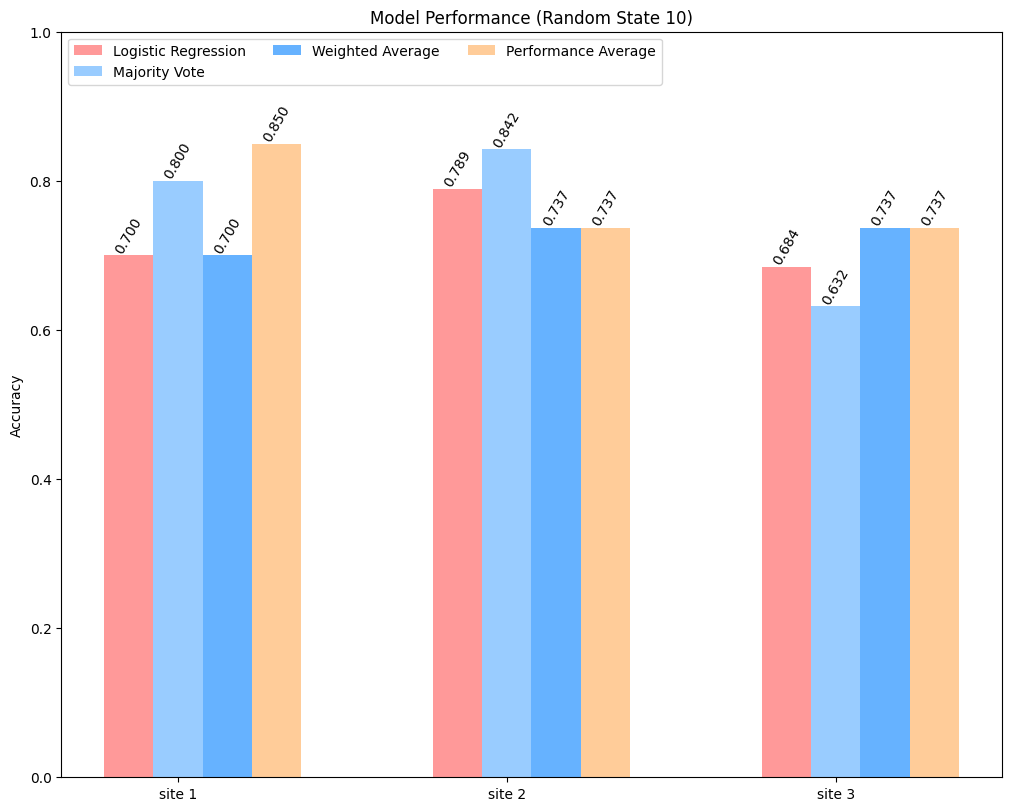

Data at site1:  (76, 9) (20, 9) (76,) (20,)
Data at site2:  (76, 9) (19, 9) (76,) (19,)
Data at site3:  (76, 9) (19, 9) (76,) (19,)
(96, 9)
(96,)
(95, 9)
(95,)
(95, 9)
(95,)
accuracy is 0.8
accuracy is 0.7368421052631579
accuracy is 0.8421052631578947
Model's Accuracy at site 1:  0.7
Model's Accuracy at site 2:  0.7894736842105263
Model's Accuracy at site 3:  0.8421052631578947


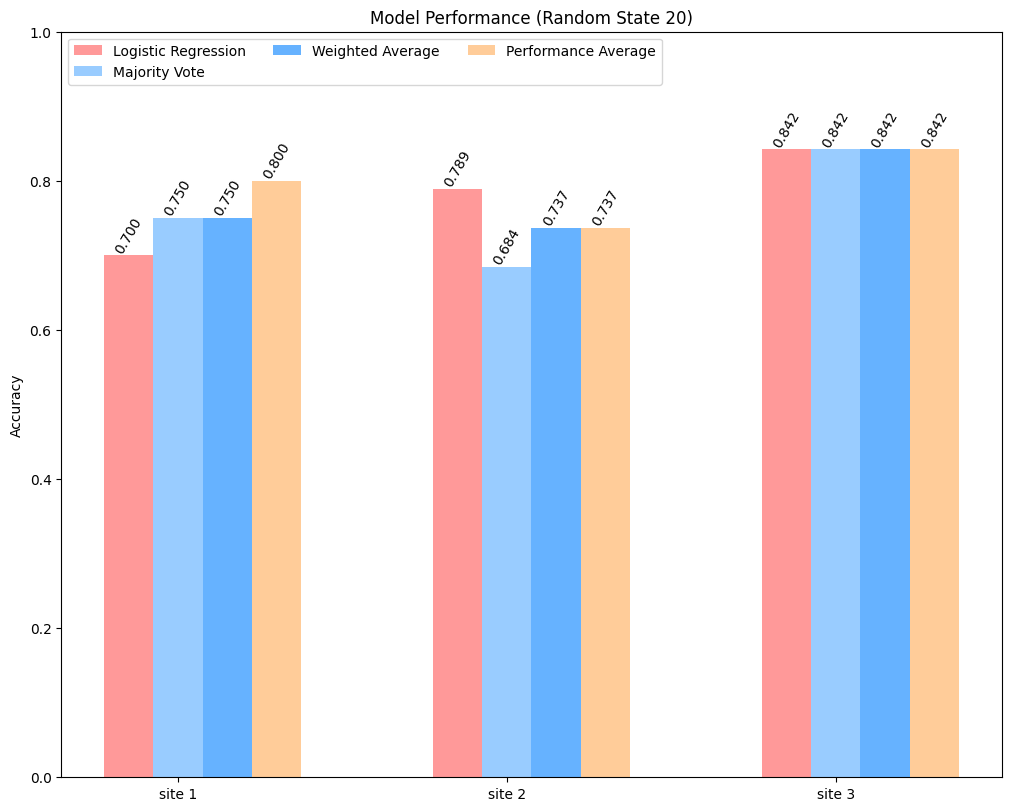

Data at site1:  (76, 9) (20, 9) (76,) (20,)
Data at site2:  (76, 9) (19, 9) (76,) (19,)
Data at site3:  (76, 9) (19, 9) (76,) (19,)
(96, 9)
(96,)
(95, 9)
(95,)
(95, 9)
(95,)
accuracy is 0.8
accuracy is 0.631578947368421
accuracy is 0.631578947368421
Model's Accuracy at site 1:  0.9
Model's Accuracy at site 2:  0.631578947368421
Model's Accuracy at site 3:  0.5789473684210527


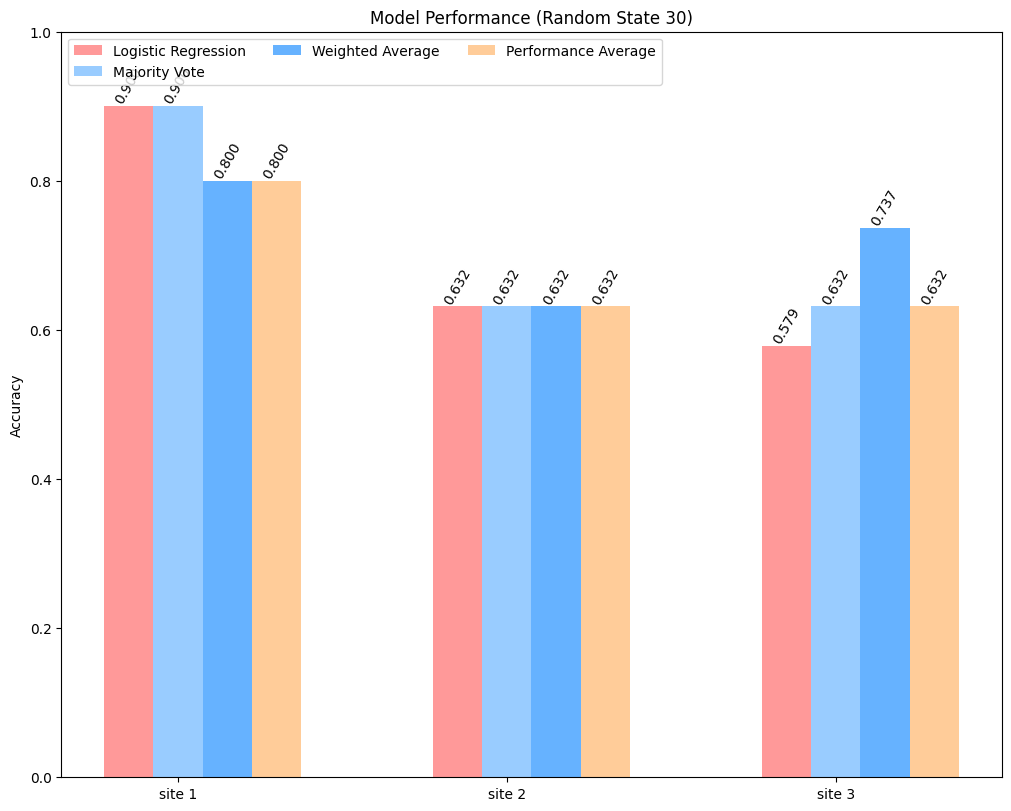

Data at site1:  (76, 9) (20, 9) (76,) (20,)
Data at site2:  (76, 9) (19, 9) (76,) (19,)
Data at site3:  (76, 9) (19, 9) (76,) (19,)
(96, 9)
(96,)
(95, 9)
(95,)
(95, 9)
(95,)
accuracy is 0.6
accuracy is 0.8421052631578947
accuracy is 0.7894736842105263
Model's Accuracy at site 1:  0.55
Model's Accuracy at site 2:  0.6842105263157895
Model's Accuracy at site 3:  0.8947368421052632


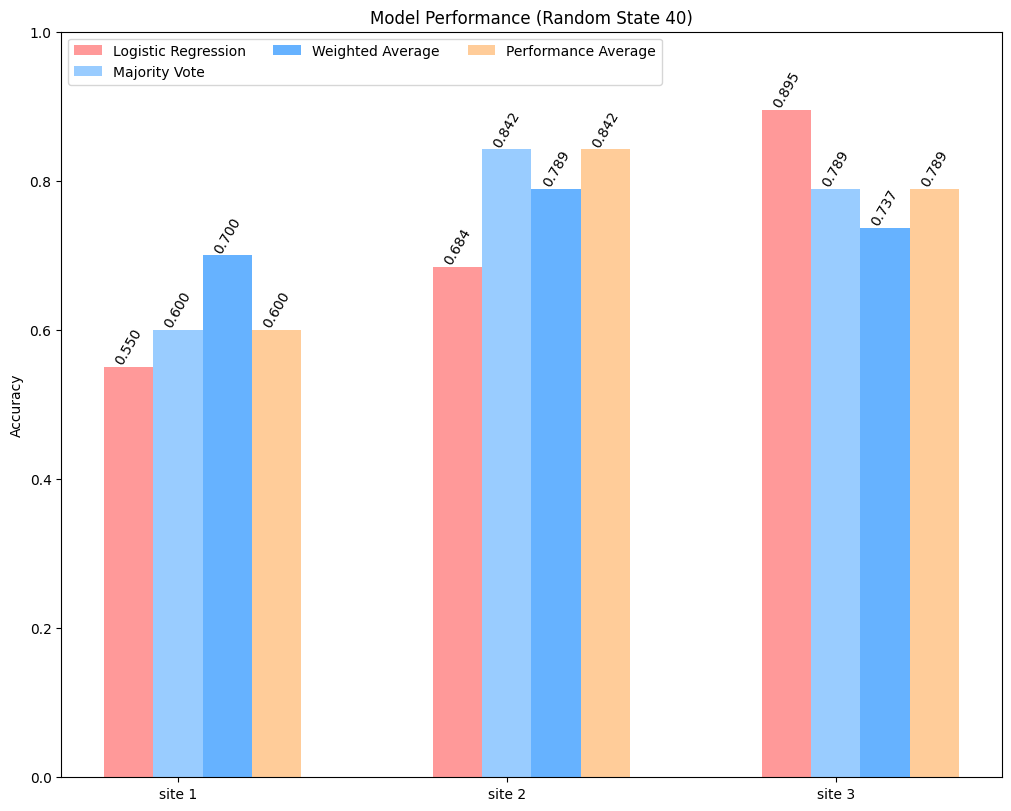

Data at site1:  (76, 9) (20, 9) (76,) (20,)
Data at site2:  (76, 9) (19, 9) (76,) (19,)
Data at site3:  (76, 9) (19, 9) (76,) (19,)
(96, 9)
(96,)
(95, 9)
(95,)
(95, 9)
(95,)
accuracy is 0.8
accuracy is 0.6842105263157895
accuracy is 0.8421052631578947
Model's Accuracy at site 1:  0.75
Model's Accuracy at site 2:  0.5789473684210527
Model's Accuracy at site 3:  0.7368421052631579


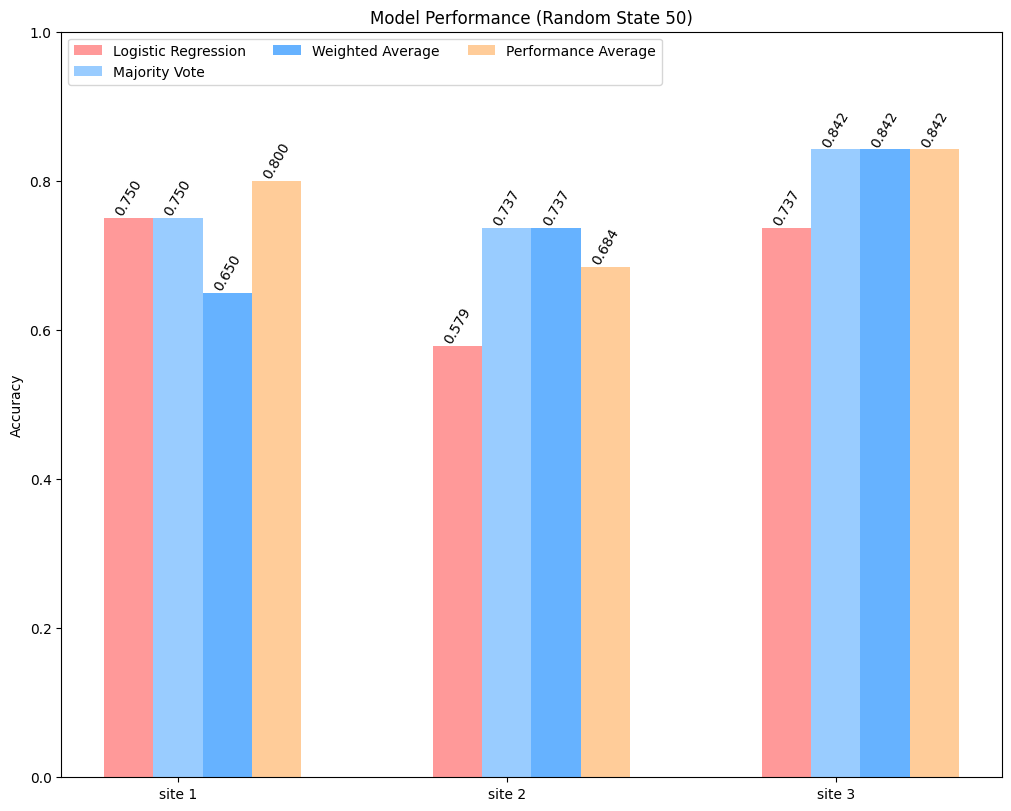

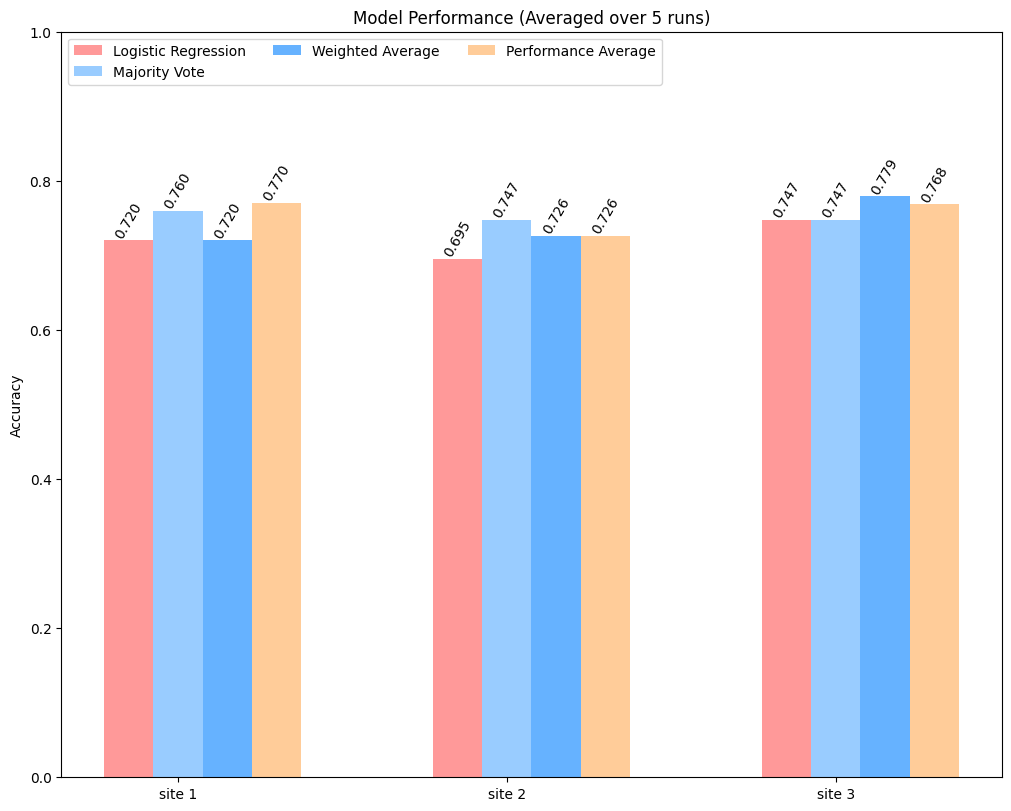

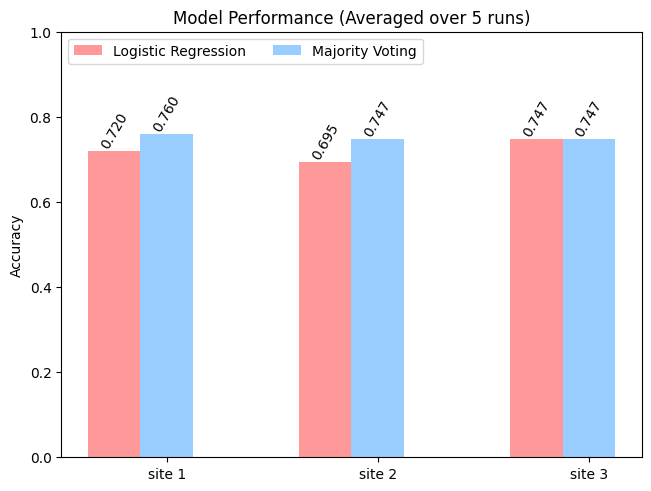

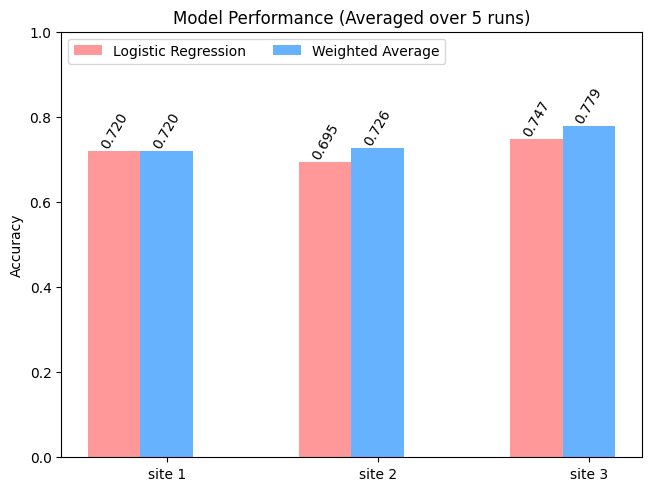

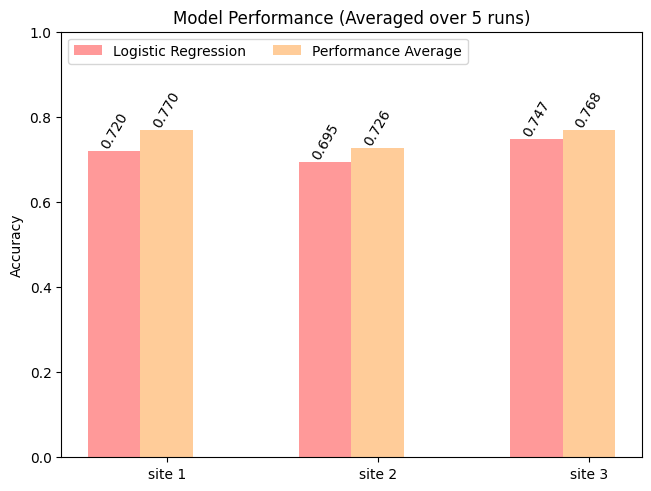

In [157]:
random_states = [10, 20, 30, 40, 50]

if __name__ == "__main__":
    main(random_states)

##Setting 2

In [158]:
X_temp, X_subsetS1, y_temp, y_subsetS1 = train_test_split(X, y, test_size=0.5, stratify=y, random_state=42)
X_subsetS2, X_subsetS3, y_subsetS2, y_subsetS3 = train_test_split(X_temp, y_temp, test_size=0.4, stratify=y_temp, random_state=42)
print("Subset 1:", X_subsetS1.shape, y_subsetS1.shape)
print("Subset 2:", X_subsetS2.shape, y_subsetS2.shape)
print("Subset 3:", X_subsetS3.shape, y_subsetS3.shape)

Subset 1: (143, 9) (143,)
Subset 2: (85, 9) (85,)
Subset 3: (58, 9) (58,)


In [159]:
def zscore(col):

  col = sc.zscore(col.astype('float'))
  return col

def prepare_data(random_state):

  X = labeldf.iloc[:, :-1]
  y = labeldf['class']


  global X_site1, y_site1, X_site2, y_site2, X_site3, y_site3


  X_temp, X_site1, y_temp, y_site1 = train_test_split(X, y, test_size=0.5, stratify=y, random_state=random_state)
  X_site2, X_site3, y_site2, y_site3 = train_test_split(X_temp, y_temp, test_size=0.4, stratify=y_temp, random_state=random_state)


  X_site1 = X_site1.apply(zscore, axis=0)
  X_site2 = X_site2.apply(zscore, axis=0)
  X_site3 = X_site3.apply(zscore, axis=0)


  global X_site1_train, X_site1_test, y_site1_train, y_site1_test
  X_site1_train, X_site1_test, y_site1_train, y_site1_test = train_test_split(X_site1, y_site1, test_size=0.2, random_state=random_state, shuffle=True,stratify=y_site1)

  global X_site2_train, X_site2_test, y_site2_train, y_site2_test
  X_site2_train, X_site2_test, y_site2_train, y_site2_test = train_test_split(X_site2, y_site2, test_size=0.2, random_state=random_state, shuffle=True,stratify=y_site2)

  global X_site3_train, X_site3_test, y_site3_train, y_site3_test
  X_site3_train, X_site3_test, y_site3_train, y_site3_test = train_test_split(X_site3, y_site3, test_size=0.2, random_state=random_state, shuffle=True,stratify=y_site3)


  print("Data at site1: ", X_site1_train.shape, X_site1_test.shape, y_site1_train.shape, y_site1_test.shape)
  print("Data at site2: ", X_site2_train.shape, X_site2_test.shape, y_site2_train.shape, y_site2_test.shape)
  print("Data at site3: ", X_site3_train.shape, X_site3_test.shape, y_site3_train.shape, y_site3_test.shape)


In [160]:
def build_site_classifier(random_state, X, y, at_site):



    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state, shuffle=True,stratify=y)

    model = LogisticRegressionCustom(lr=0.01, epochs=1000)
    model.train(X_train, y_train)
    test_predictions = model.predict(X_test)
    test_accuracy = np.mean(test_predictions == y_test)



    return model, test_accuracy, X_test, y_test

In [161]:
from sklearn.metrics import accuracy_score


In [162]:
def combined_accuracy(X_site_test, y_site_test, at_site):

    combined_predictions = pd.concat([pd.DataFrame(model1.predict(X_site_test)),
                            pd.DataFrame(model2.predict(X_site_test)),
                            pd.DataFrame(model3.predict(X_site_test))], axis=1)

    combined_predictions['mode']=combined_predictions.mode(axis=1)

    accuracy = accuracy_score(combined_predictions['mode'], y_site_test)
    return accuracy



In [163]:
def weighted_prob_avg_predict(X_test, y_test, threshold=0.6):

    total_data = sum(data_sizes)
    weights = [size / total_data for size in data_sizes]

    probs = np.zeros(X_test.shape[0])
    for model, weight in zip(model_list, weights):
        probs += weight * model.predict_proba(X_test)

    final_preds = (probs >= threshold).astype(int)

    accuracy = accuracy_score(y_test, final_preds)

    return accuracy


In [164]:


def combined_performance_prediction(X_test, Y_test, threshold=0.5):

    performance_scores = []
    for model, x_test, y_test in zip(model_list, x_sites, y_sites):
        preds = model.predict(x_test)
        acc = accuracy_score(y_test, preds)
        performance_scores.append(acc)

    weights = np.array(performance_scores) / np.sum(performance_scores)


    probs = np.zeros(X_test.shape[0])
    for model, weight in zip(model_list, weights):
        probs += weight * model.predict_proba(X_test)


    final_preds = (probs >= threshold).astype(int)
    accuracy = accuracy_score(Y_test, final_preds)
    print("accuracy is",accuracy)

    return accuracy




In [165]:
def plot_comparison_major(accuracy_site1, accuracy_site2, accuracy_site3,
                    combined_accuracy_site1, combined_accuracy_site2, combined_accuracy_site3,
                     title,fname):

    sites = ("site 1", "site 2", "site 3")
    accuracy = {
        'Logistic Regression': (accuracy_site1, accuracy_site2, accuracy_site3),
        'Majority Voting': (combined_accuracy_site1, combined_accuracy_site2, combined_accuracy_site3)

    }

    colors = {
        'Logistic Regression': '#FF9999',
        'Majority Voting': '#99CCFF'


    }


    x = np.arange(len(sites))  # the label locations
    width = 0.25  # the width of the bars
    multiplier = 0

    fig, ax = plt.subplots(layout='constrained')

    for attribute, measurement in accuracy.items():
        offset = width * multiplier
        rects = ax.bar(x + offset, measurement, width, label=attribute,color=colors[attribute])
        ax.bar_label(rects, padding=0, rotation=60, fmt='{:,.3f}')
        multiplier += 1

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('Accuracy')
    ax.set_title(title)
    # ax.set_title('Model Performance RS = '+f'{random_state}')
    ax.set_xticks(x + width, sites)
    ax.legend(loc='upper left', ncols=3)
    ax.set_ylim(0.0, 1.00)
    ax.grid(False)

    plt.show()

    # fig_name = "random_state_"+f'{random_state}'+".png"
    fig.savefig(fname)
    plt.close(fig)

In [166]:
def plot_comparison_avg(accuracy_site1, accuracy_site2, accuracy_site3,
                    combined_w_site1, combined_w_site2, combined_w_site3,
                     title,fname):

    sites = ("site 1", "site 2", "site 3")
    accuracy = {
        'Logistic Regression': (accuracy_site1, accuracy_site2, accuracy_site3),
        'Weighted Average': (combined_w_site1, combined_w_site2, combined_w_site3)

    }

    colors = {
        'Logistic Regression': '#FF9999',
        'Weighted Average': '#66B2FF'

    }


    x = np.arange(len(sites))  # the label locations
    width = 0.25  # the width of the bars
    multiplier = 0

    fig, ax = plt.subplots(layout='constrained')

    for attribute, measurement in accuracy.items():
        offset = width * multiplier
        rects = ax.bar(x + offset, measurement, width, label=attribute,color=colors[attribute])
        ax.bar_label(rects, padding=0, rotation=60, fmt='{:,.3f}')
        multiplier += 1

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('Accuracy')
    ax.set_title(title)
    # ax.set_title('Model Performance RS = '+f'{random_state}')
    ax.set_xticks(x + width, sites)
    ax.legend(loc='upper left', ncols=3)
    ax.set_ylim(0.0, 1.00)
    ax.grid(False)

    plt.show()

    # fig_name = "random_state_"+f'{random_state}'+".png"
    fig.savefig(fname)
    plt.close(fig)

In [167]:
def plot_comparison_perf(accuracy_site1, accuracy_site2, accuracy_site3,
                    combined_per_site1, combined_per_site2, combined_per_site3,
                     title,fname):

    sites = ("site 1", "site 2", "site 3")
    accuracy = {
        'Logistic Regression': (accuracy_site1, accuracy_site2, accuracy_site3),
        'Performance Average': (combined_per_site1, combined_per_site2, combined_per_site3),

    }

    colors = {
        'Logistic Regression': '#FF9999',
        'Performance Average': '#FFCC99'

    }


    x = np.arange(len(sites))  # the label locations
    width = 0.25  # the width of the bars
    multiplier = 0

    fig, ax = plt.subplots(layout='constrained')

    for attribute, measurement in accuracy.items():
        offset = width * multiplier
        rects = ax.bar(x + offset, measurement, width, label=attribute,color=colors[attribute])
        ax.bar_label(rects, padding=0, rotation=60, fmt='{:,.3f}')
        multiplier += 1

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('Accuracy')
    ax.set_title(title)
    # ax.set_title('Model Performance RS = '+f'{random_state}')
    ax.set_xticks(x + width, sites)
    ax.legend(loc='upper left', ncols=3)
    ax.set_ylim(0.0, 1.00)
    ax.grid(False)

    plt.show()

    # fig_name = "random_state_"+f'{random_state}'+".png"
    fig.savefig(fname)
    plt.close(fig)

In [168]:
def plot_comparison(accuracy_site1, accuracy_site2, accuracy_site3,
                    combined_accuracy_site1, combined_accuracy_site2, combined_accuracy_site3, combined_w_site1,combined_w_site2,combined_w_site3, combined_per_site1, combined_per_site2, combined_per_site3,
                    title,fname):

    sites = ("site 1", "site 2", "site 3")
    accuracy = {
        'Logistic Regression': (accuracy_site1, accuracy_site2, accuracy_site3),
        'Majority Vote': (combined_accuracy_site1, combined_accuracy_site2, combined_accuracy_site3),
        'Weighted Average': (combined_w_site1, combined_w_site2, combined_w_site3),
        'Performance Average': (combined_per_site1, combined_per_site2, combined_per_site3)

    }

    colors = {
        'Logistic Regression': '#FF9999',
        'Majority Vote': '#99CCFF',
        'Weighted Average': '#66B2FF',
        'Performance Average': '#FFCC99'

    }


    x = np.arange(len(sites))  # the label locations
    width = 0.15  # the width of the bars
    multiplier = 0

    fig, ax = plt.subplots(layout='constrained')
    ##
    fig.set_size_inches(10, 8)

    for attribute, measurement in accuracy.items():
        offset = width * multiplier
        rects = ax.bar(x + offset, measurement, width, label=attribute,color=colors[attribute])
        ax.bar_label(rects, padding=0, rotation=60, fmt='{:,.3f}')
        multiplier += 1

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('Accuracy')
    ax.set_title(title)
    # ax.set_title('Model Performance RS = '+f'{random_state}')
    ax.set_xticks(x + width, sites)
    ax.legend(loc='upper left', ncols=3)
    ax.set_ylim(0.0, 1.00)

    plt.show()

    # fig_name = "random_state_"+f'{random_state}'+".png"
    fig.savefig(fname)
    plt.close(fig)

In [169]:
def run_model(random_state):

    prepare_data(random_state)

    global model1, site1_accuracy, X_site1_test, y_site1_test
    model1, site1_accuracy, X_site1_test, y_site1_test = build_site_classifier(42, X_site1, y_site1, 1)

    global model2, site2_accuracy, X_site2_test, y_site2_test
    model2, site2_accuracy, X_site2_test, y_site2_test = build_site_classifier(42, X_site2, y_site2, 2)

    global model3, site3_accuracy, X_site3_test, y_site3_test
    model3, site3_accuracy, X_site3_test, y_site3_test = build_site_classifier(42, X_site3, y_site3, 3)

    global model_list, data_sizes
    model_list = [model1, model2, model3]
    data_sizes = [len(X_site1_test), len(X_site2_test), len(X_site3_test)]

    global x_sites, y_sites
    x_sites= [X_site1_test, X_site2_test, X_site3_test]
    y_sites= [y_site1_test, y_site2_test, y_site3_test]





    global accuracy_site1
    accuracy_site1 = accuracy_score(pd.DataFrame(model1.predict(X_site1_test)), y_site1_test)

    global combined_accuracy_test_site1
    combined_accuracy_site1 = combined_accuracy(X_site1_test, y_site1_test, "With test data of site 1")

    global accuracy_site2
    accuracy_site2 = accuracy_score(pd.DataFrame(model2.predict(X_site2_test)), y_site2_test)

    global combined_accuracy_test_site2
    combined_accuracy_site2 = combined_accuracy(X_site2_test, y_site2_test, "With test data of site 2")

    global accuracy_site3
    accuracy_site3 = accuracy_score(pd.DataFrame(model3.predict(X_site3_test)), y_site3_test)

    global combined_accuracy_test_site3
    combined_accuracy_site3 = combined_accuracy(X_site3_test, y_site3_test, "With test data of site 3")

    global combined_w_site1
    combined_w_site1 = weighted_prob_avg_predict(X_site1_test, y_site1_test)

    global combined_w_site2
    combined_w_site2 = weighted_prob_avg_predict(X_site2_test, y_site2_test)

    global combined_w_site3
    combined_w_site3 = weighted_prob_avg_predict(X_site3_test, y_site3_test)

    global combined_per_site1
    combined_per_site1= combined_performance_prediction (X_site1_test, y_site1_test)

    global combined_per_site2
    combined_per_site2= combined_performance_prediction (X_site2_test, y_site2_test)

    global combined_per_site3
    combined_per_site3= combined_performance_prediction (X_site3_test, y_site3_test)







    print("Model's Accuracy at site 1: ", accuracy_site1)
    accuracy_site1_list.append(accuracy_site1)
    print("Model's Accuracy at site 2: ", accuracy_site2)
    accuracy_site2_list.append(accuracy_site2)
    print("Model's Accuracy at site 3: ", accuracy_site3)
    accuracy_site3_list.append(accuracy_site3)





    combined_accuracy_site1_list.append(combined_accuracy_site1)
    combined_accuracy_site2_list.append(combined_accuracy_site2)
    combined_accuracy_site3_list.append(combined_accuracy_site3)

    combined_w_site1_list.append(combined_w_site1)
    combined_w_site2_list.append(combined_w_site2)
    combined_w_site3_list.append(combined_w_site3)


    combined_perf_site1_list.append(combined_per_site1)
    combined_perf_site2_list.append(combined_per_site2)
    combined_perf_site3_list.append(combined_per_site3)




    plot_title = 'Model Performance (Random State '+f'{random_state})'
    fname = "random_state_"+f'{random_state}'+".png"
    plot_comparison(accuracy_site1, accuracy_site2, accuracy_site3,combined_accuracy_site1, combined_accuracy_site2, combined_accuracy_site3,combined_w_site1,combined_w_site2,combined_w_site3,combined_per_site1,combined_per_site2,combined_per_site3, plot_title, fname)


###This cell is the main function call




In [170]:

def main(random_states):
    global accuracy_site1_list, accuracy_site2_list, accuracy_site3_list
    accuracy_site1_list, accuracy_site2_list, accuracy_site3_list = ([] for i in range(3))


    global combined_accuracy_site1_list, combined_accuracy_site2_list, combined_accuracy_site3_list
    combined_accuracy_site1_list, combined_accuracy_site2_list, combined_accuracy_site3_list = ([] for i in range(3))

    global combined_w_site1_list, combined_w_site2_list, combined_w_site3_list
    combined_w_site1_list, combined_w_site2_list, combined_w_site3_list = ([] for i in range(3))

    global combined_perf_site1_list, combined_perf_site2_list, combined_perf_site3_list
    combined_perf_site1_list, combined_perf_site2_list, combined_perf_site3_list = ([] for i in range(3))


    global random_state


    for random_state in random_states:
        run_model(random_state)

    num = len(random_states)

    plot_title = "Model Performance (Averaged over "+f'{num}'+" runs)"
    fname = "Averaged_"+f'{num}'+"_runs.png"
    plot_comparison(np.average(accuracy_site1_list), np.average(accuracy_site2_list), np.average(accuracy_site3_list), np.average(combined_accuracy_site1_list), np.average(combined_accuracy_site2_list),np.average(combined_accuracy_site3_list),np.average(combined_w_site1_list),np.average(combined_w_site2_list),np.average(combined_w_site3_list),np.average(combined_perf_site1_list),np.average(combined_perf_site2_list),np.average(combined_perf_site3_list), plot_title, fname)
    plot_comparison_major(np.average(accuracy_site1_list), np.average(accuracy_site2_list), np.average(accuracy_site3_list),np.average(combined_accuracy_site1_list), np.average(combined_accuracy_site2_list), np.average(combined_accuracy_site3_list), plot_title, fname)
    plot_comparison_avg(np.average(accuracy_site1_list), np.average(accuracy_site2_list), np.average(accuracy_site3_list),
                    np.average(combined_w_site1_list), np.average(combined_w_site2_list), np.average(combined_w_site3_list),
                     plot_title,fname)
    plot_comparison_perf(np.average(accuracy_site1_list), np.average(accuracy_site2_list), np.average(accuracy_site3_list),
                    np.average(combined_perf_site1_list), np.average(combined_perf_site2_list), np.average(combined_perf_site3_list),
                     plot_title,fname)





Data at site1:  (114, 9) (29, 9) (114,) (29,)
Data at site2:  (68, 9) (17, 9) (68,) (17,)
Data at site3:  (46, 9) (12, 9) (46,) (12,)
accuracy is 0.6206896551724138
accuracy is 0.7647058823529411
accuracy is 0.5
Model's Accuracy at site 1:  0.6206896551724138
Model's Accuracy at site 2:  0.7058823529411765
Model's Accuracy at site 3:  0.6666666666666666


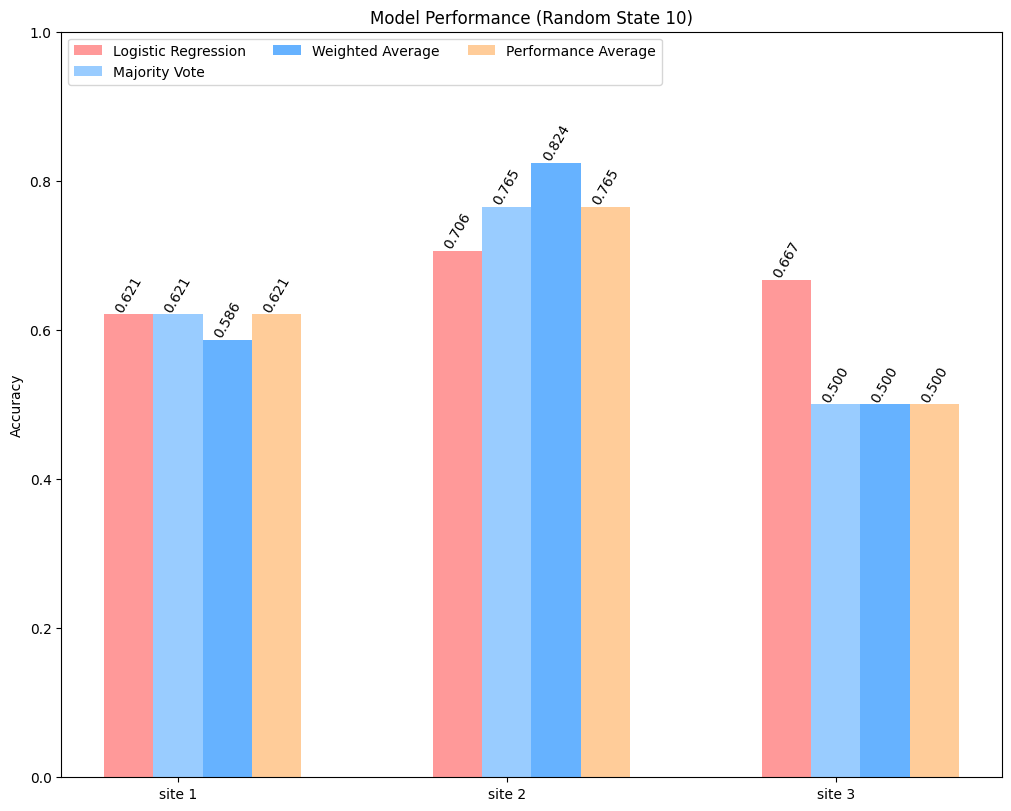

Data at site1:  (114, 9) (29, 9) (114,) (29,)
Data at site2:  (68, 9) (17, 9) (68,) (17,)
Data at site3:  (46, 9) (12, 9) (46,) (12,)
accuracy is 0.7241379310344828
accuracy is 0.6470588235294118
accuracy is 0.8333333333333334
Model's Accuracy at site 1:  0.6896551724137931
Model's Accuracy at site 2:  0.7058823529411765
Model's Accuracy at site 3:  0.8333333333333334


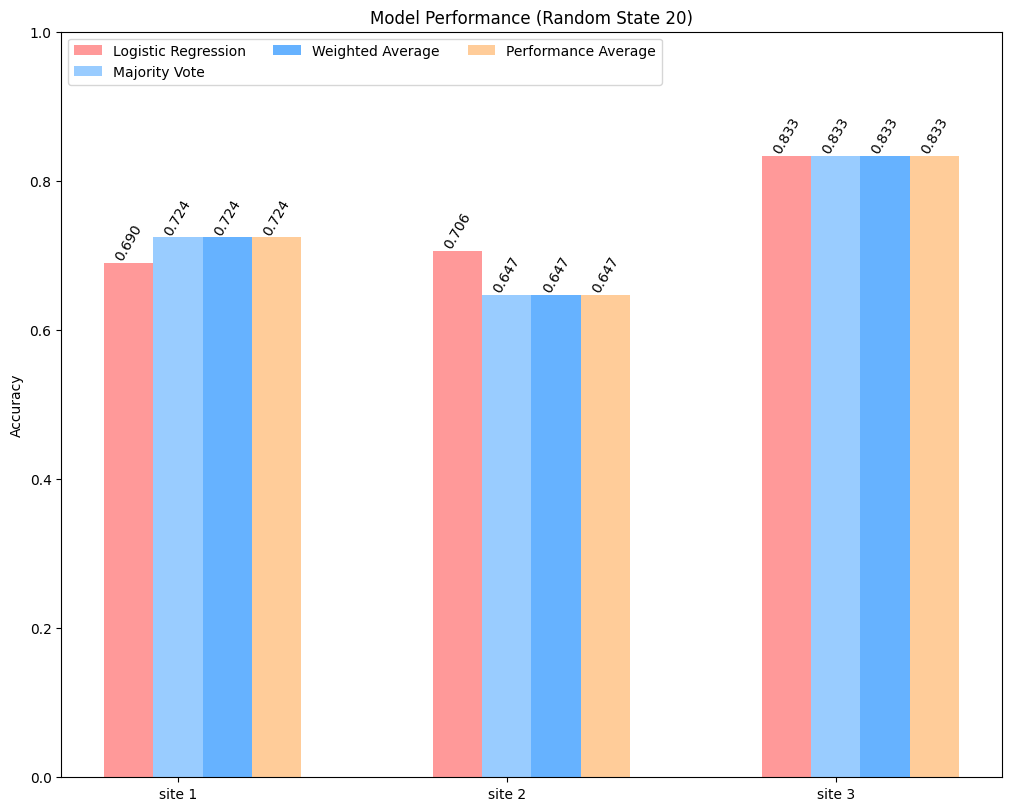

Data at site1:  (114, 9) (29, 9) (114,) (29,)
Data at site2:  (68, 9) (17, 9) (68,) (17,)
Data at site3:  (46, 9) (12, 9) (46,) (12,)
accuracy is 0.7586206896551724
accuracy is 0.7647058823529411
accuracy is 0.8333333333333334
Model's Accuracy at site 1:  0.7586206896551724
Model's Accuracy at site 2:  0.7647058823529411
Model's Accuracy at site 3:  0.8333333333333334


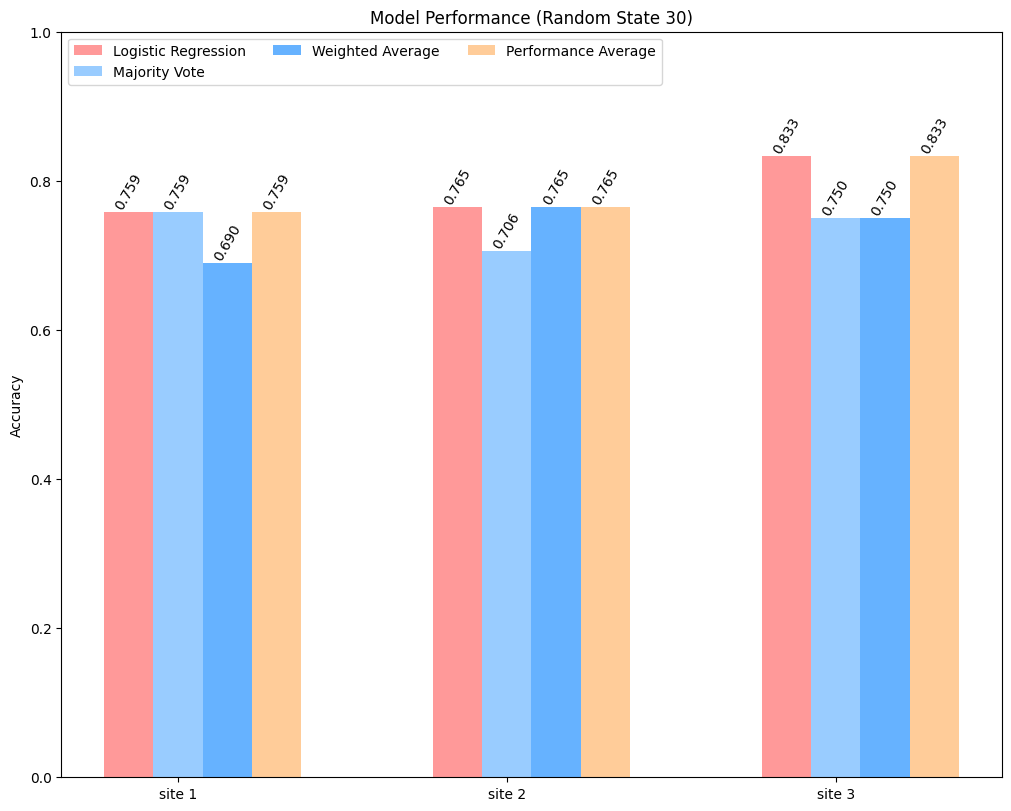

Data at site1:  (114, 9) (29, 9) (114,) (29,)
Data at site2:  (68, 9) (17, 9) (68,) (17,)
Data at site3:  (46, 9) (12, 9) (46,) (12,)
accuracy is 0.7241379310344828
accuracy is 0.8823529411764706
accuracy is 0.5
Model's Accuracy at site 1:  0.7241379310344828
Model's Accuracy at site 2:  0.6470588235294118
Model's Accuracy at site 3:  0.5833333333333334


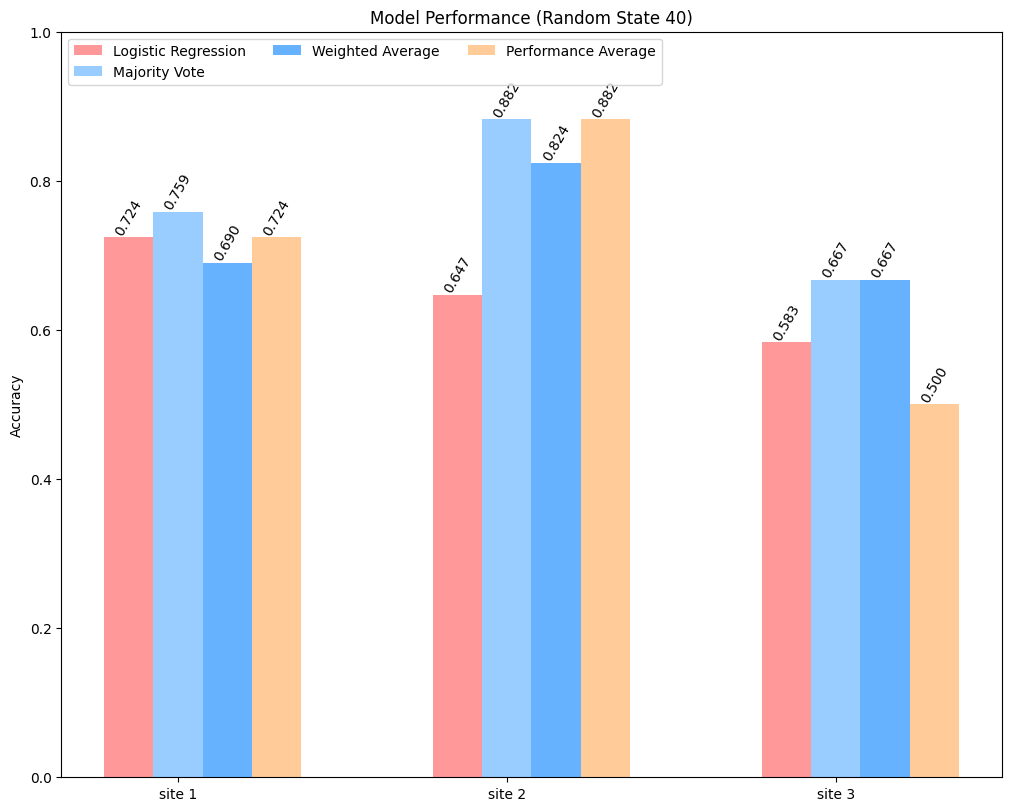

Data at site1:  (114, 9) (29, 9) (114,) (29,)
Data at site2:  (68, 9) (17, 9) (68,) (17,)
Data at site3:  (46, 9) (12, 9) (46,) (12,)
accuracy is 0.6896551724137931
accuracy is 0.8235294117647058
accuracy is 0.8333333333333334
Model's Accuracy at site 1:  0.7241379310344828
Model's Accuracy at site 2:  0.7647058823529411
Model's Accuracy at site 3:  0.75


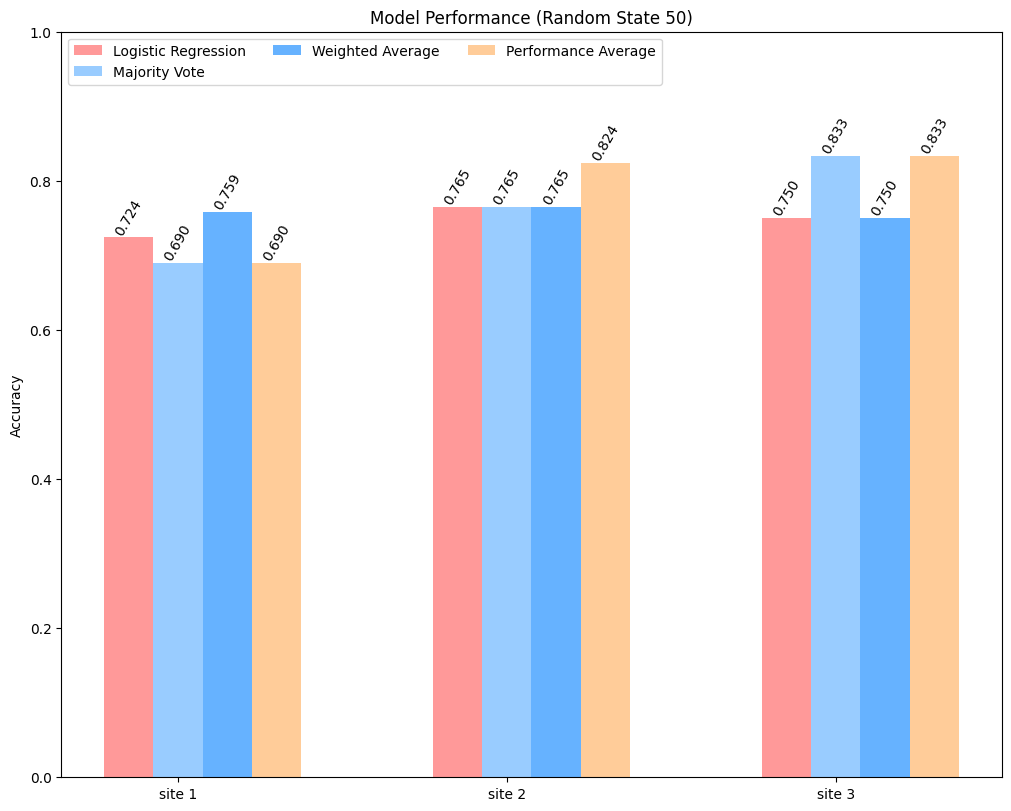

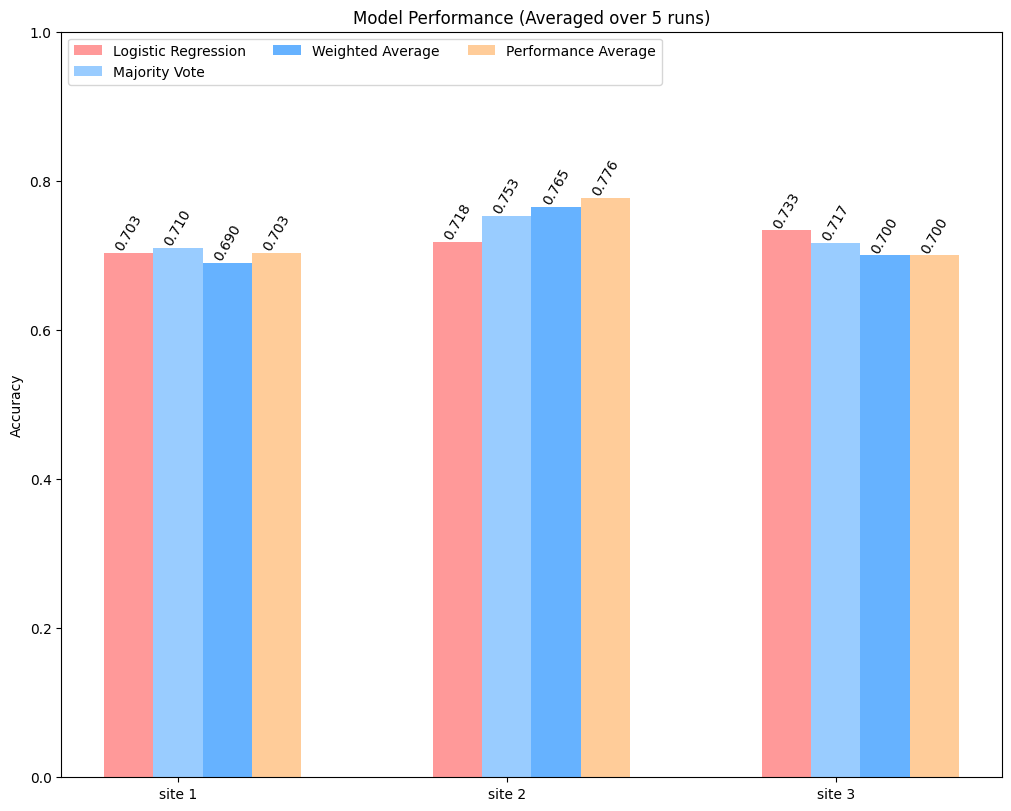

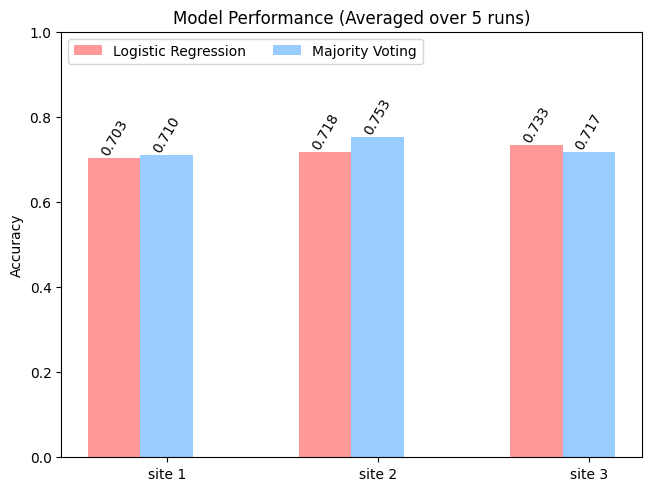

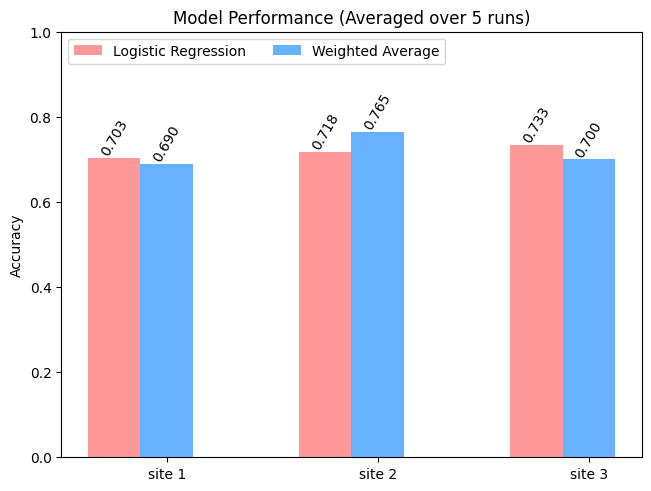

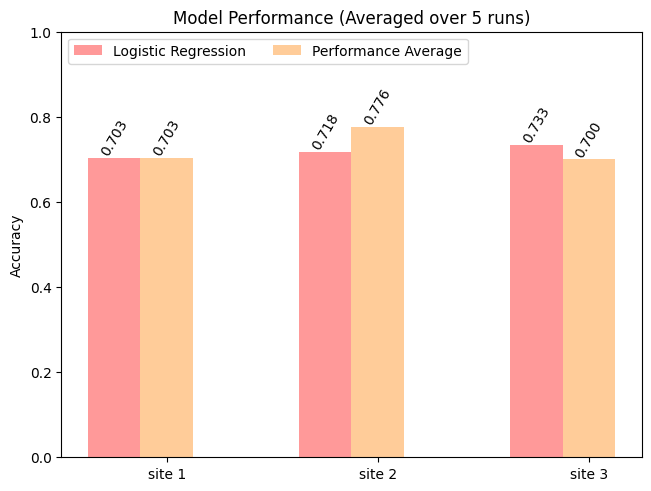

In [171]:
random_states = [10, 20, 30, 40, 50]

if __name__ == "__main__":
    main(random_states)

## Setting 3

In [172]:

X_temp, X_subsetSS1, y_temp, y_subsetSS1 = train_test_split(X, y, test_size=0.5, random_state=42)
X_subsetSS2, X_subsetSS3, y_subsetSS2, y_subsetSS3 = train_test_split(X_temp, y_temp, test_size=0.4, random_state=42)
print("Subset 1:", X_subsetSS1.shape, y_subsetSS1.shape)
print("Subset 2:", X_subsetSS2.shape, y_subsetSS2.shape)
print("Subset 3:", X_subsetSS3.shape, y_subsetSS3.shape)

Subset 1: (143, 9) (143,)
Subset 2: (85, 9) (85,)
Subset 3: (58, 9) (58,)


In [173]:
print(y_subsetSS1.value_counts())
print(y_subsetSS2.value_counts())
print(y_subsetSS3.value_counts())

class
0    101
1     42
Name: count, dtype: int64
class
0    60
1    25
Name: count, dtype: int64
class
0    40
1    18
Name: count, dtype: int64


In [174]:
def zscore(col):

  col = sc.zscore(col.astype('float'))
  return col

def prepare_data(random_state):

  X = labeldf.iloc[:, :-1]
  y = labeldf['class']


  global X_site1, y_site1, X_site2, y_site2, X_site3, y_site3


  X_temp, X_site1, y_temp, y_site1 = train_test_split(X, y, test_size=0.5, random_state=random_state)
  X_site2, X_site3, y_site2, y_site3 = train_test_split(X_temp, y_temp, test_size=0.4,random_state=random_state)


  X_site1 = X_site1.apply(zscore, axis=0)
  X_site2 = X_site2.apply(zscore, axis=0)
  X_site3 = X_site3.apply(zscore, axis=0)


  global X_site1_train, X_site1_test, y_site1_train, y_site1_test
  X_site1_train, X_site1_test, y_site1_train, y_site1_test = train_test_split(X_site1, y_site1, test_size=0.2, random_state=random_state, shuffle=True,stratify=y_site1)

  global X_site2_train, X_site2_test, y_site2_train, y_site2_test
  X_site2_train, X_site2_test, y_site2_train, y_site2_test = train_test_split(X_site2, y_site2, test_size=0.2, random_state=random_state, shuffle=True,stratify=y_site2)

  global X_site3_train, X_site3_test, y_site3_train, y_site3_test
  X_site3_train, X_site3_test, y_site3_train, y_site3_test = train_test_split(X_site3, y_site3, test_size=0.2, random_state=random_state, shuffle=True,stratify=y_site3)


  print("Data at site1: ", X_site1_train.shape, X_site1_test.shape, y_site1_train.shape, y_site1_test.shape)
  print("Data at site2: ", X_site2_train.shape, X_site2_test.shape, y_site2_train.shape, y_site2_test.shape)
  print("Data at site3: ", X_site3_train.shape, X_site3_test.shape, y_site3_train.shape, y_site3_test.shape)


In [175]:
def build_site_classifier(random_state, X, y, at_site):



    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state, shuffle=True,stratify=y)

    model = LogisticRegressionCustom(lr=0.01, epochs=1000)
    model.train(X_train, y_train)
    test_predictions = model.predict(X_test)
    test_accuracy = np.mean(test_predictions == y_test)



    return model, test_accuracy, X_test, y_test

In [176]:
from sklearn.metrics import accuracy_score


In [177]:
def combined_accuracy(X_site_test, y_site_test, at_site):

    combined_predictions = pd.concat([pd.DataFrame(model1.predict(X_site_test)),
                            pd.DataFrame(model2.predict(X_site_test)),
                            pd.DataFrame(model3.predict(X_site_test))], axis=1)

    combined_predictions['mode']=combined_predictions.mode(axis=1)

    accuracy = accuracy_score(combined_predictions['mode'], y_site_test)
    return accuracy



In [178]:
def weighted_prob_avg_predict(X_test, y_test, threshold=0.6):

    total_data = sum(data_sizes)
    weights = [size / total_data for size in data_sizes]

    probs = np.zeros(X_test.shape[0])
    for model, weight in zip(model_list, weights):
        probs += weight * model.predict_proba(X_test)

    final_preds = (probs >= threshold).astype(int)

    accuracy = accuracy_score(y_test, final_preds)

    return accuracy


In [179]:


def combined_performance_prediction(X_test, Y_test, threshold=0.5):

    performance_scores = []
    for model, x_test, y_test in zip(model_list, x_sites, y_sites):
        preds = model.predict(x_test)
        acc = accuracy_score(y_test, preds)
        performance_scores.append(acc)

    weights = np.array(performance_scores) / np.sum(performance_scores)


    probs = np.zeros(X_test.shape[0])
    for model, weight in zip(model_list, weights):
        probs += weight * model.predict_proba(X_test)


    final_preds = (probs >= threshold).astype(int)
    accuracy = accuracy_score(Y_test, final_preds)
    print("accuracy is",accuracy)

    return accuracy




In [180]:
def plot_comparison_major(accuracy_site1, accuracy_site2, accuracy_site3,
                    combined_accuracy_site1, combined_accuracy_site2, combined_accuracy_site3,
                     title,fname):

    sites = ("site 1", "site 2", "site 3")
    accuracy = {
        'Logistic Regression': (accuracy_site1, accuracy_site2, accuracy_site3),
        'Majority Voting': (combined_accuracy_site1, combined_accuracy_site2, combined_accuracy_site3)

    }

    colors = {
        'Logistic Regression': '#FF9999',
        'Majority Voting': '#99CCFF'


    }


    x = np.arange(len(sites))  # the label locations
    width = 0.25  # the width of the bars
    multiplier = 0

    fig, ax = plt.subplots(layout='constrained')

    for attribute, measurement in accuracy.items():
        offset = width * multiplier
        rects = ax.bar(x + offset, measurement, width, label=attribute,color=colors[attribute])
        ax.bar_label(rects, padding=0, rotation=60, fmt='{:,.3f}')
        multiplier += 1

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('Accuracy')
    ax.set_title(title)
    # ax.set_title('Model Performance RS = '+f'{random_state}')
    ax.set_xticks(x + width, sites)
    ax.legend(loc='upper left', ncols=3)
    ax.set_ylim(0.0, 1.00)
    ax.grid(False)

    plt.show()

    # fig_name = "random_state_"+f'{random_state}'+".png"
    fig.savefig(fname)
    plt.close(fig)

In [181]:
def plot_comparison_avg(accuracy_site1, accuracy_site2, accuracy_site3,
                    combined_w_site1, combined_w_site2, combined_w_site3,
                     title,fname):

    sites = ("site 1", "site 2", "site 3")
    accuracy = {
        'Logistic Regression': (accuracy_site1, accuracy_site2, accuracy_site3),
        'Weighted Average': (combined_w_site1, combined_w_site2, combined_w_site3)

    }

    colors = {
        'Logistic Regression': '#FF9999',
        'Weighted Average': '#66B2FF'

    }


    x = np.arange(len(sites))  # the label locations
    width = 0.25  # the width of the bars
    multiplier = 0

    fig, ax = plt.subplots(layout='constrained')

    for attribute, measurement in accuracy.items():
        offset = width * multiplier
        rects = ax.bar(x + offset, measurement, width, label=attribute,color=colors[attribute])
        ax.bar_label(rects, padding=0, rotation=60, fmt='{:,.3f}')
        multiplier += 1

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('Accuracy')
    ax.set_title(title)
    # ax.set_title('Model Performance RS = '+f'{random_state}')
    ax.set_xticks(x + width, sites)
    ax.legend(loc='upper left', ncols=3)
    ax.set_ylim(0.0, 1.00)
    ax.grid(False)

    plt.show()

    # fig_name = "random_state_"+f'{random_state}'+".png"
    fig.savefig(fname)
    plt.close(fig)

In [182]:
def plot_comparison_perf(accuracy_site1, accuracy_site2, accuracy_site3,
                    combined_per_site1, combined_per_site2, combined_per_site3,
                     title,fname):

    sites = ("site 1", "site 2", "site 3")
    accuracy = {
        'Logistic Regression': (accuracy_site1, accuracy_site2, accuracy_site3),
        'Performance Average': (combined_per_site1, combined_per_site2, combined_per_site3),

    }

    colors = {
        'Logistic Regression': '#FF9999',
        'Performance Average': '#FFCC99'

    }


    x = np.arange(len(sites))  # the label locations
    width = 0.25  # the width of the bars
    multiplier = 0

    fig, ax = plt.subplots(layout='constrained')

    for attribute, measurement in accuracy.items():
        offset = width * multiplier
        rects = ax.bar(x + offset, measurement, width, label=attribute,color=colors[attribute])
        ax.bar_label(rects, padding=0, rotation=60, fmt='{:,.3f}')
        multiplier += 1

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('Accuracy')
    ax.set_title(title)
    # ax.set_title('Model Performance RS = '+f'{random_state}')
    ax.set_xticks(x + width, sites)
    ax.legend(loc='upper left', ncols=3)
    ax.set_ylim(0.0, 1.00)
    ax.grid(False)

    plt.show()

    # fig_name = "random_state_"+f'{random_state}'+".png"
    fig.savefig(fname)
    plt.close(fig)

In [183]:
def plot_comparison(accuracy_site1, accuracy_site2, accuracy_site3,
                    combined_accuracy_site1, combined_accuracy_site2, combined_accuracy_site3, combined_w_site1,combined_w_site2,combined_w_site3, combined_per_site1, combined_per_site2, combined_per_site3,
                    title,fname):

    sites = ("site 1", "site 2", "site 3")
    accuracy = {
        'Logistic Regression': (accuracy_site1, accuracy_site2, accuracy_site3),
        'Majority Vote': (combined_accuracy_site1, combined_accuracy_site2, combined_accuracy_site3),
        'Weighted Average': (combined_w_site1, combined_w_site2, combined_w_site3),
        'Performance Average': (combined_per_site1, combined_per_site2, combined_per_site3)

    }

    colors = {
        'Logistic Regression': '#FF9999',
        'Majority Vote': '#99CCFF',
        'Weighted Average': '#66B2FF',
        'Performance Average': '#FFCC99'

    }


    x = np.arange(len(sites))  # the label locations
    width = 0.15  # the width of the bars
    multiplier = 0

    fig, ax = plt.subplots(layout='constrained')
    ##
    fig.set_size_inches(10, 8)

    for attribute, measurement in accuracy.items():
        offset = width * multiplier
        rects = ax.bar(x + offset, measurement, width, label=attribute,color=colors[attribute])
        ax.bar_label(rects, padding=0, rotation=60, fmt='{:,.3f}')
        multiplier += 1

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('Accuracy')
    ax.set_title(title)
    # ax.set_title('Model Performance RS = '+f'{random_state}')
    ax.set_xticks(x + width, sites)
    ax.legend(loc='upper left', ncols=3)
    ax.set_ylim(0.0, 1.00)

    plt.show()

    # fig_name = "random_state_"+f'{random_state}'+".png"
    fig.savefig(fname)
    plt.close(fig)

In [184]:
def run_model(random_state):

    prepare_data(random_state)

    global model1, site1_accuracy, X_site1_test, y_site1_test
    model1, site1_accuracy, X_site1_test, y_site1_test = build_site_classifier(42, X_site1, y_site1, 1)

    global model2, site2_accuracy, X_site2_test, y_site2_test
    model2, site2_accuracy, X_site2_test, y_site2_test = build_site_classifier(42, X_site2, y_site2, 2)

    global model3, site3_accuracy, X_site3_test, y_site3_test
    model3, site3_accuracy, X_site3_test, y_site3_test = build_site_classifier(42, X_site3, y_site3, 3)

    global model_list, data_sizes
    model_list = [model1, model2, model3]
    data_sizes = [len(X_site1_test), len(X_site2_test), len(X_site3_test)]

    global x_sites, y_sites
    x_sites= [X_site1_test, X_site2_test, X_site3_test]
    y_sites= [y_site1_test, y_site2_test, y_site3_test]





    global accuracy_site1
    accuracy_site1 = accuracy_score(pd.DataFrame(model1.predict(X_site1_test)), y_site1_test)

    global combined_accuracy_test_site1
    combined_accuracy_site1 = combined_accuracy(X_site1_test, y_site1_test, "With test data of site 1")

    global accuracy_site2
    accuracy_site2 = accuracy_score(pd.DataFrame(model2.predict(X_site2_test)), y_site2_test)

    global combined_accuracy_test_site2
    combined_accuracy_site2 = combined_accuracy(X_site2_test, y_site2_test, "With test data of site 2")

    global accuracy_site3
    accuracy_site3 = accuracy_score(pd.DataFrame(model3.predict(X_site3_test)), y_site3_test)

    global combined_accuracy_test_site3
    combined_accuracy_site3 = combined_accuracy(X_site3_test, y_site3_test, "With test data of site 3")

    global combined_w_site1
    combined_w_site1 = weighted_prob_avg_predict(X_site1_test, y_site1_test)

    global combined_w_site2
    combined_w_site2 = weighted_prob_avg_predict(X_site2_test, y_site2_test)

    global combined_w_site3
    combined_w_site3 = weighted_prob_avg_predict(X_site3_test, y_site3_test)

    global combined_per_site1
    combined_per_site1= combined_performance_prediction (X_site1_test, y_site1_test)

    global combined_per_site2
    combined_per_site2= combined_performance_prediction (X_site2_test, y_site2_test)

    global combined_per_site3
    combined_per_site3= combined_performance_prediction (X_site3_test, y_site3_test)







    print("Model's Accuracy at site 1: ", accuracy_site1)
    accuracy_site1_list.append(accuracy_site1)
    print("Model's Accuracy at site 2: ", accuracy_site2)
    accuracy_site2_list.append(accuracy_site2)
    print("Model's Accuracy at site 3: ", accuracy_site3)
    accuracy_site3_list.append(accuracy_site3)





    combined_accuracy_site1_list.append(combined_accuracy_site1)
    combined_accuracy_site2_list.append(combined_accuracy_site2)
    combined_accuracy_site3_list.append(combined_accuracy_site3)

    combined_w_site1_list.append(combined_w_site1)
    combined_w_site2_list.append(combined_w_site2)
    combined_w_site3_list.append(combined_w_site3)


    combined_perf_site1_list.append(combined_per_site1)
    combined_perf_site2_list.append(combined_per_site2)
    combined_perf_site3_list.append(combined_per_site3)




    plot_title = 'Model Performance (Random State '+f'{random_state})'
    fname = "random_state_"+f'{random_state}'+".png"
    plot_comparison(accuracy_site1, accuracy_site2, accuracy_site3,combined_accuracy_site1, combined_accuracy_site2, combined_accuracy_site3,combined_w_site1,combined_w_site2,combined_w_site3,combined_per_site1,combined_per_site2,combined_per_site3, plot_title, fname)


###This cell is the main function call




In [185]:

def main(random_states):
    global accuracy_site1_list, accuracy_site2_list, accuracy_site3_list
    accuracy_site1_list, accuracy_site2_list, accuracy_site3_list = ([] for i in range(3))


    global combined_accuracy_site1_list, combined_accuracy_site2_list, combined_accuracy_site3_list
    combined_accuracy_site1_list, combined_accuracy_site2_list, combined_accuracy_site3_list = ([] for i in range(3))

    global combined_w_site1_list, combined_w_site2_list, combined_w_site3_list
    combined_w_site1_list, combined_w_site2_list, combined_w_site3_list = ([] for i in range(3))

    global combined_perf_site1_list, combined_perf_site2_list, combined_perf_site3_list
    combined_perf_site1_list, combined_perf_site2_list, combined_perf_site3_list = ([] for i in range(3))


    global random_state


    for random_state in random_states:
        run_model(random_state)

    num = len(random_states)

    plot_title = "Model Performance (Averaged over "+f'{num}'+" runs)"
    fname = "Averaged_"+f'{num}'+"_runs.png"
    plot_comparison(np.average(accuracy_site1_list), np.average(accuracy_site2_list), np.average(accuracy_site3_list), np.average(combined_accuracy_site1_list), np.average(combined_accuracy_site2_list),np.average(combined_accuracy_site3_list),np.average(combined_w_site1_list),np.average(combined_w_site2_list),np.average(combined_w_site3_list),np.average(combined_perf_site1_list),np.average(combined_perf_site2_list),np.average(combined_perf_site3_list), plot_title, fname)
    plot_comparison_major(np.average(accuracy_site1_list), np.average(accuracy_site2_list), np.average(accuracy_site3_list),np.average(combined_accuracy_site1_list), np.average(combined_accuracy_site2_list), np.average(combined_accuracy_site3_list), plot_title, fname)
    plot_comparison_avg(np.average(accuracy_site1_list), np.average(accuracy_site2_list), np.average(accuracy_site3_list),
                    np.average(combined_w_site1_list), np.average(combined_w_site2_list), np.average(combined_w_site3_list),
                     plot_title,fname)
    plot_comparison_perf(np.average(accuracy_site1_list), np.average(accuracy_site2_list), np.average(accuracy_site3_list),
                    np.average(combined_perf_site1_list), np.average(combined_perf_site2_list), np.average(combined_perf_site3_list),
                     plot_title,fname)






Data at site1:  (114, 9) (29, 9) (114,) (29,)
Data at site2:  (68, 9) (17, 9) (68,) (17,)
Data at site3:  (46, 9) (12, 9) (46,) (12,)
accuracy is 0.8275862068965517
accuracy is 0.7647058823529411
accuracy is 0.8333333333333334
Model's Accuracy at site 1:  0.6896551724137931
Model's Accuracy at site 2:  0.8823529411764706
Model's Accuracy at site 3:  0.75


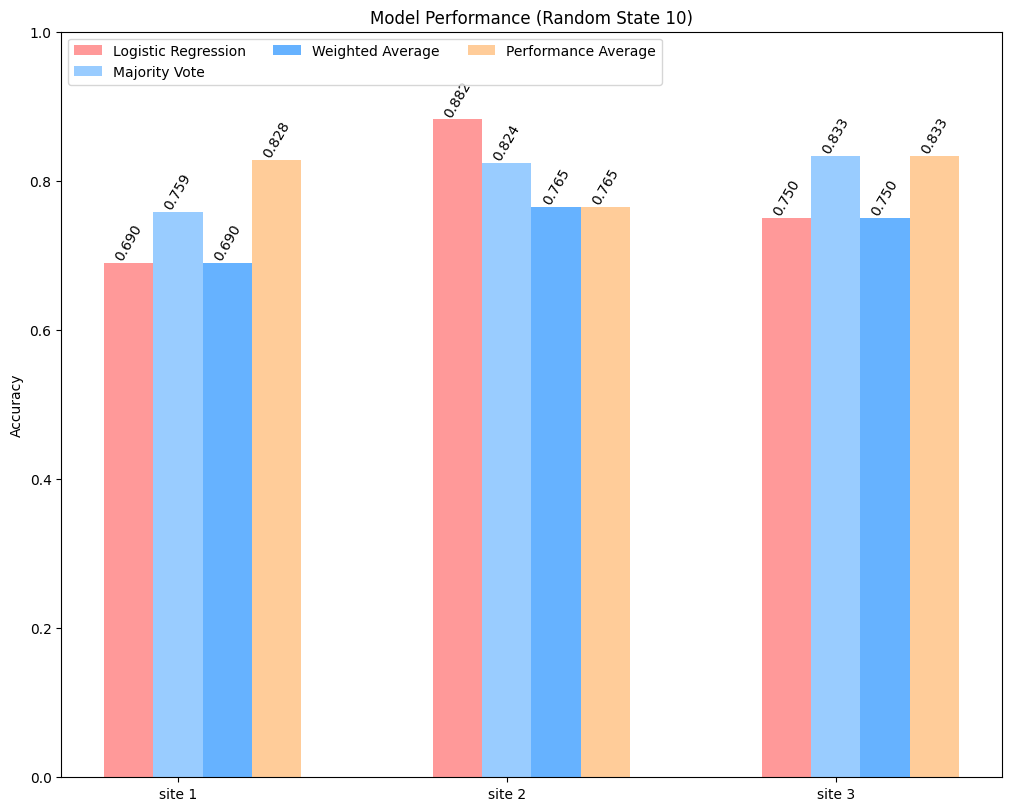

Data at site1:  (114, 9) (29, 9) (114,) (29,)
Data at site2:  (68, 9) (17, 9) (68,) (17,)
Data at site3:  (46, 9) (12, 9) (46,) (12,)
accuracy is 0.7241379310344828
accuracy is 0.7058823529411765
accuracy is 0.75
Model's Accuracy at site 1:  0.6896551724137931
Model's Accuracy at site 2:  0.5882352941176471
Model's Accuracy at site 3:  0.6666666666666666


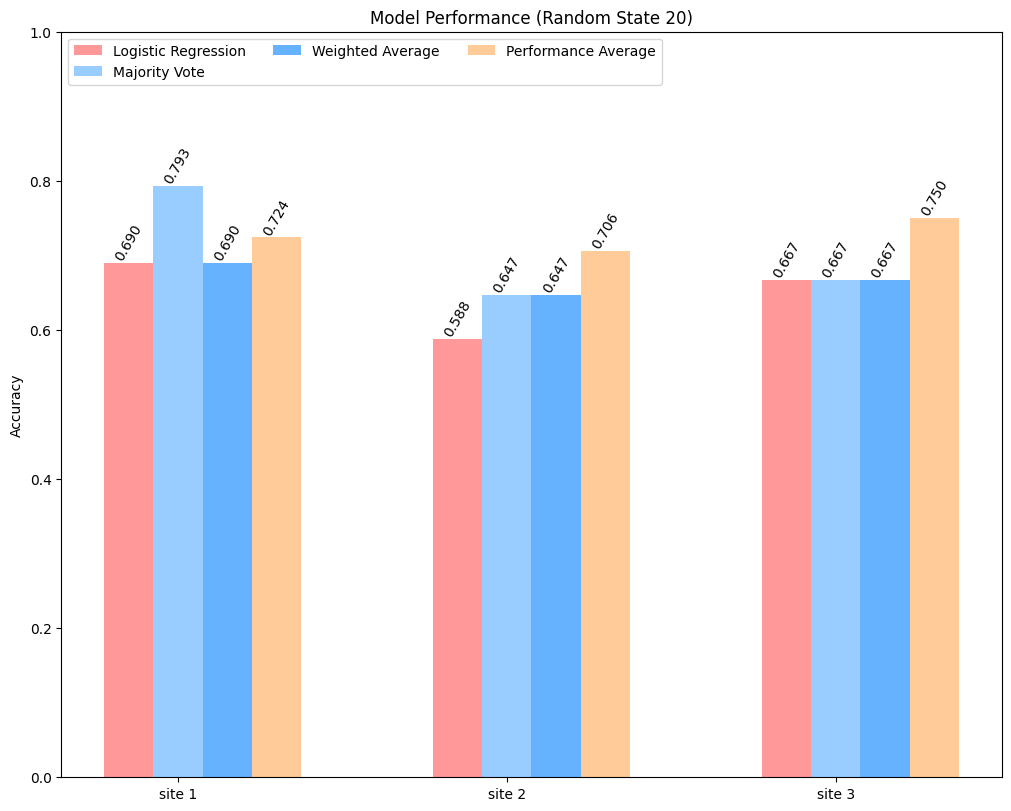

Data at site1:  (114, 9) (29, 9) (114,) (29,)
Data at site2:  (68, 9) (17, 9) (68,) (17,)
Data at site3:  (46, 9) (12, 9) (46,) (12,)
accuracy is 0.7241379310344828
accuracy is 0.5294117647058824
accuracy is 0.75
Model's Accuracy at site 1:  0.7241379310344828
Model's Accuracy at site 2:  0.5882352941176471
Model's Accuracy at site 3:  0.6666666666666666


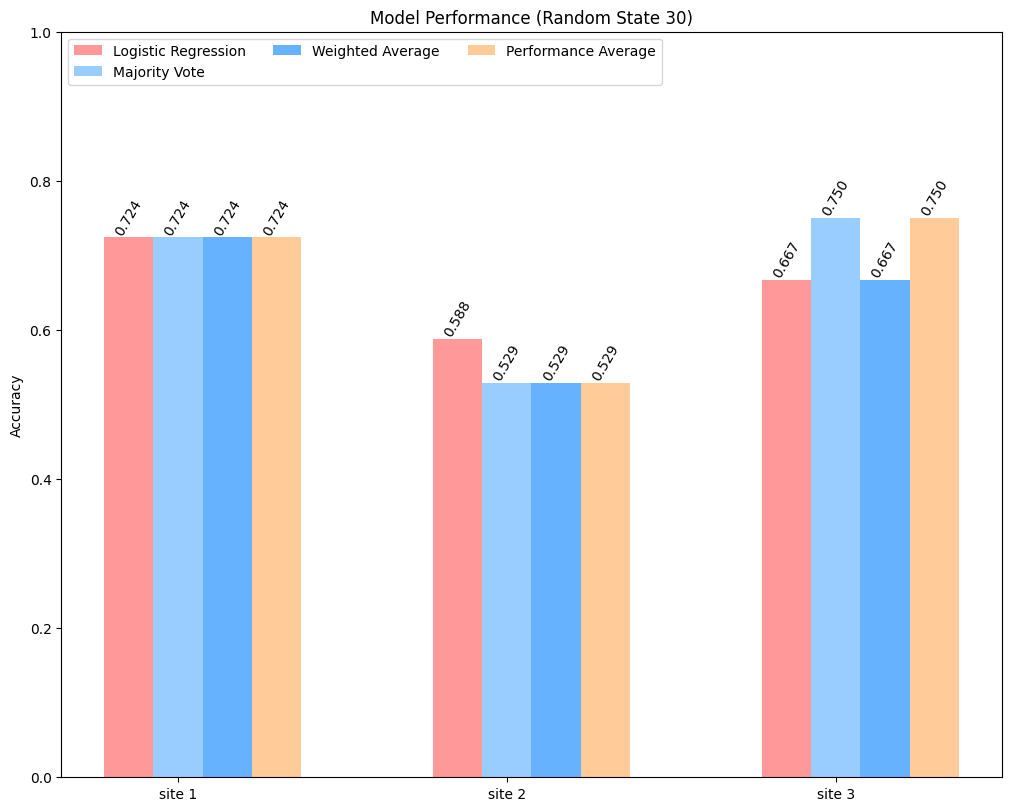

Data at site1:  (114, 9) (29, 9) (114,) (29,)
Data at site2:  (68, 9) (17, 9) (68,) (17,)
Data at site3:  (46, 9) (12, 9) (46,) (12,)
accuracy is 0.6551724137931034
accuracy is 0.7058823529411765
accuracy is 0.9166666666666666
Model's Accuracy at site 1:  0.5862068965517241
Model's Accuracy at site 2:  0.6470588235294118
Model's Accuracy at site 3:  0.75


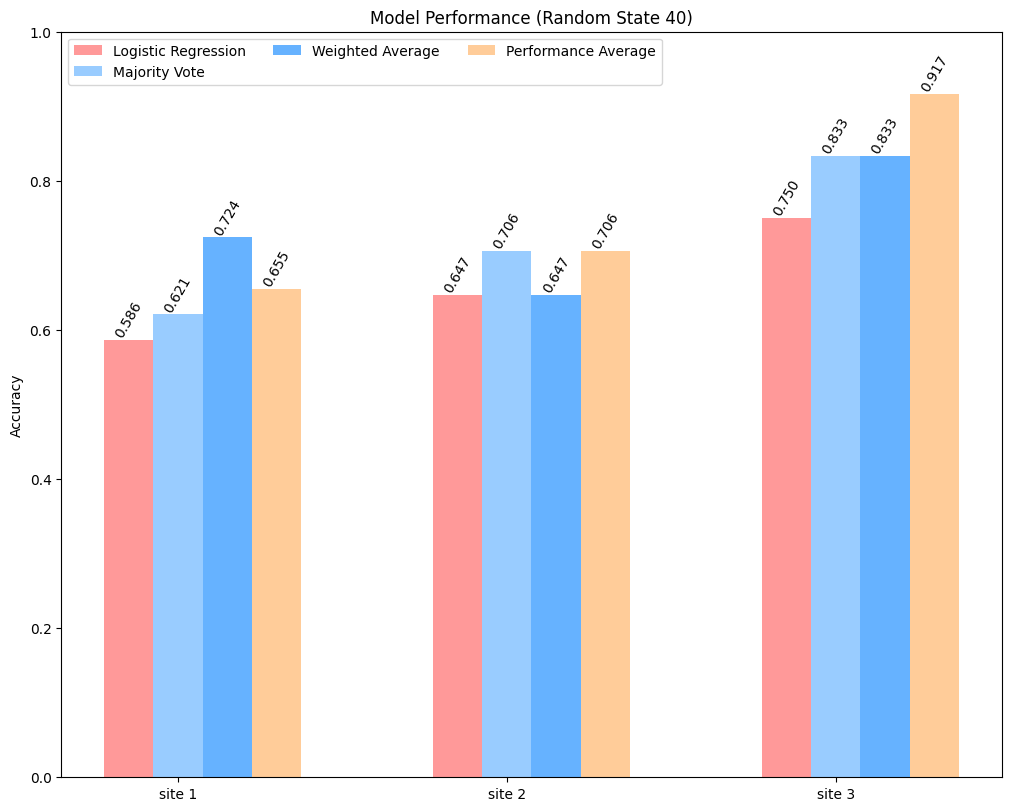

Data at site1:  (114, 9) (29, 9) (114,) (29,)
Data at site2:  (68, 9) (17, 9) (68,) (17,)
Data at site3:  (46, 9) (12, 9) (46,) (12,)
accuracy is 0.7586206896551724
accuracy is 0.7058823529411765
accuracy is 0.8333333333333334
Model's Accuracy at site 1:  0.7931034482758621
Model's Accuracy at site 2:  0.6470588235294118
Model's Accuracy at site 3:  0.5


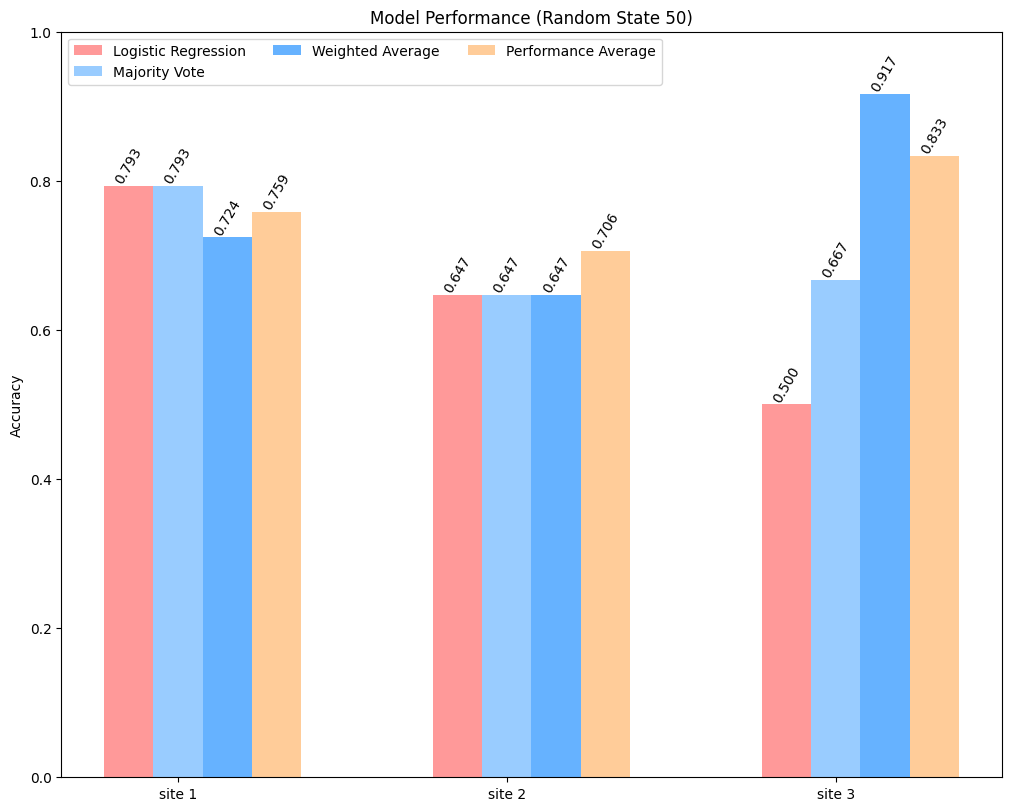

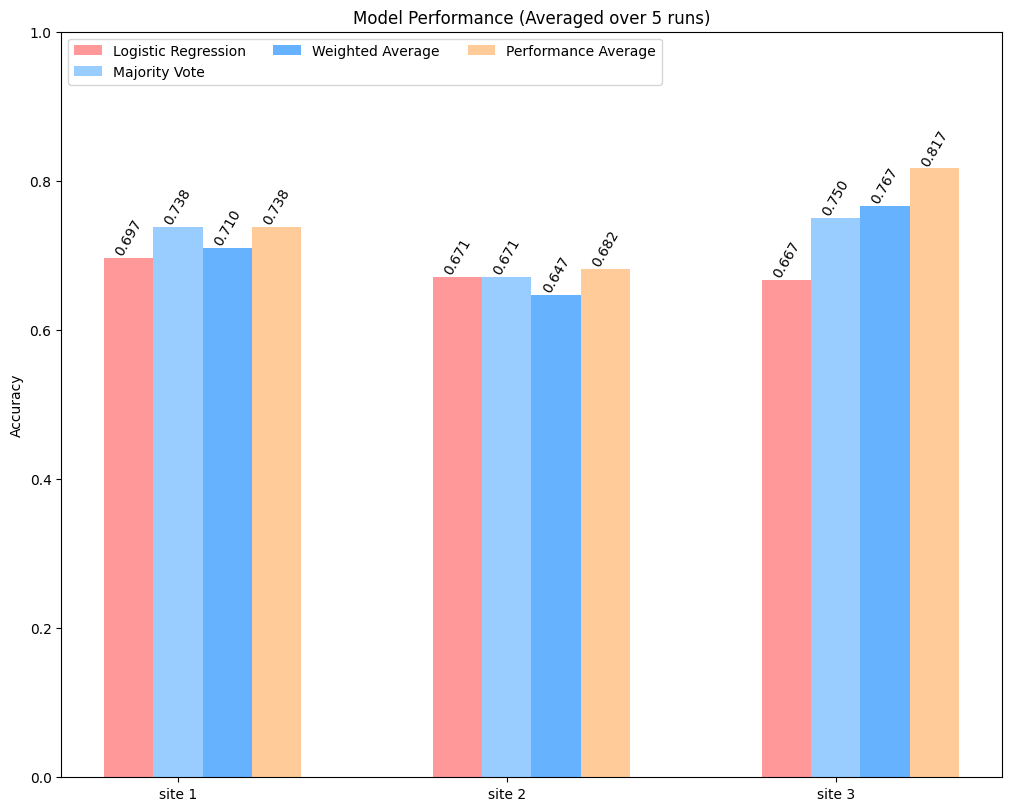

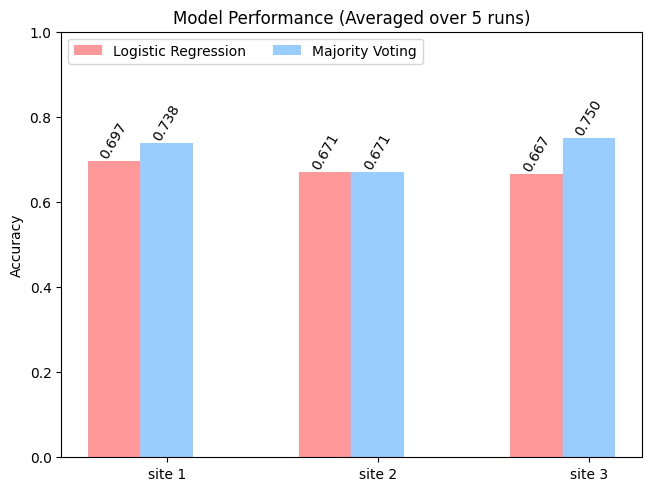

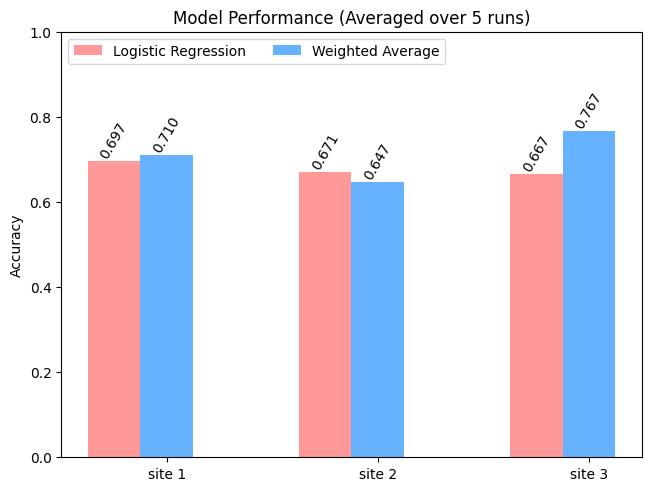

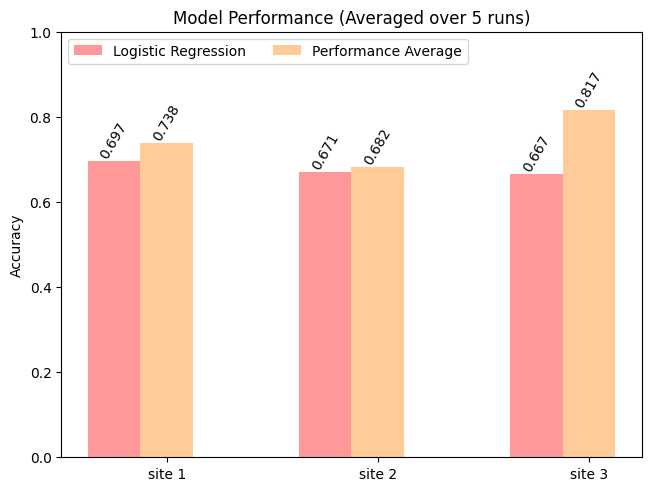

In [186]:
random_states = [10, 20, 30, 40, 50]

if __name__ == "__main__":
    main(random_states)